In [18]:
%load_ext autoreload
%autoreload 2

import os,sys,warnings
import h5py, pandas
import numpy as np
np.seterr(invalid=['ignore','warn'][0])
np.set_printoptions(legacy='1.25')
import math,cmath,pickle
from matplotlib.backends.backend_pdf import PdfPages
from scipy.optimize import curve_fit
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('default')
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.titlesize'] = 20
mpl.rcParams['figure.figsize'] = [6.4*1.2,4.8*1.2]
mpl.rcParams['axes.labelsize'] = 30
mpl.rcParams['axes.titlesize'] = 30
mpl.rcParams['lines.marker'] = 's'
mpl.rcParams['lines.linestyle'] = ''
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['errorbar.capsize'] = 12
mpl.rcParams['xtick.labelsize'] = mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['xtick.major.size'] = mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.top']=mpl.rcParams['ytick.right']=True
mpl.rcParams['xtick.direction']=mpl.rcParams['ytick.direction']='in'
mpl.rcParams['legend.fontsize'] = 24
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

# mpl.rcParams.update({"axes.grid" : True})
import util as yu
yu.flag_fast=False

enss=['b','c','d']
ens2full={'a24':'cA211.53.24','a':'cA2.09.48','b':'B64','c':'C80','d':'D96'}
ens2label={'a24':'A24','a':'A48','b':'B64','c':'C80','d':'D96'}
ens2a={'a24':0.0908,'a':0.0938,'b':0.07957,'c':0.06821,'d':0.05692, 'A15':0.1163} # fm
ens2N={'a24':24,'a':48,'b':64,'c':80,'d':96, 'A15':48}
ens2N_T={'a24':24*2,'a':48*2,'b':64*2,'c':80*2,'d':96*2, 'A15':48}

# ens2mN={'a':931}
# ens2mpiC={'a':131}
# ens2mpi0={'a':111}

ens2amu={'a24':0.0053,'a':0.0009,'b':0.00072}
ens2ZP={'a24':(0.4670,0.0046),'a':(0.500,0.030)}

hbarc = 1/197.3
ens2aInv={ens:1/(ens2a[ens]*hbarc) for ens in enss+['A15']} # MeV

ens='b'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
path='/capstor/store/cscs/userlab/s1174/lyan/code/projectData/fromBooster/projectDataMigrating/NST_b-discNJN/data/'
data={}
for ens in enss:
    with h5py.File(f'{path}NST_b.h5_c{ens2label[ens]}') as f:
        t=(f['diags/N/data/N2_N2'][:,:,0]+f['diags/N/data/N2_N2'][:,:,1])/2
        data[ens]=yu.jackknife(np.real(t))
        # print(f['diags/N/opabs'][[0,1]])
        print(ens,t.shape)
        
path='/capstor/store/cscs/userlab/s1174/lyan/code/projectData2/03_NpiScatteringWilson/A15/data_merge/NpiScatteringWilson_Nsrc=3000.h5'
with h5py.File(path) as f:
    moms=[tuple(mom) for mom in f['momsN']]
    ind=moms.index((0,0,0))
    t=f['data/N'][:,:,ind,:]
    t=(t[:,:,0]+t[:,:,5])/2
    data['A15']=yu.jackknife(np.real(t))
    print('A15',t.shape)
        

b (743, 36)
c (400, 40)
d (494, 48)
A15 (211, 48)


In [3]:
ens='b'
def c2Hankle(c2pt,ts,shift=0):
    tmax=len(c2pt)-np.max(ts)*2 - shift
    return np.array([[[c2pt[t+i+j+shift] for i in ts] for j in ts] for t in range(tmax)])    
c2pt_jk=data[ens]
hankel=c2Hankle(c2pt_jk[0],[0,1,2,3],shift=1)
h0=hankel[0]
h1=hankel[1]
# print(h0)
# print(h1)

hh=np.linalg.inv(h0)@h1
evl,evt=np.linalg.eig(hh)

v_in=evt
zl_in=h0@v_in
zr_ni=np.linalg.inv(v_in)
an=zl_in[0,:]*zr_ni[:,0]
print(np.abs(an/h0[0,0]))

# print(evl[0])
# print(evt[:,0])

# print(np.linalg.eig(h1))

# print(hh@evt[:,0])

# print(np.conj(evt[:,0])@h1@evt[:,0])
# print(np.conj(evt[:,0])@h0@evt[:,0])
# print(evl[0]*np.conj(evt[:,0])@h0@evt[:,0])
# print(evl[1]*np.conj(evt[:,0])@h0@evt[:,0])
# print(np.conj(evt[:,0])@h1@evt[:,0]-evl[0]*np.conj(evt[:,0])@h0@evt[:,0])

[0.02406305 0.02406305 0.3996214  0.552316  ]


t_maxused=2
[[24.3194]]
[[13.503651]]
EigResult(eigenvalues=array([24.3194], dtype=float32), eigenvectors=array([[1.]], dtype=float32))
evl [0.55526245]
evect [1.]
0.55526245

t_maxused=4
[[24.3194    13.503651 ]
 [13.503651   7.9642158]]
[[13.503651   7.9642158]
 [ 7.9642158  4.932102 ]]
EigResult(eigenvalues=array([31.928562  ,  0.35505432], dtype=float32), eigenvectors=array([[ 0.87120706, -0.49091578],
       [ 0.49091578,  0.87120706]], dtype=float32))
evl [0.40820256 0.68560207]
evect [ 0.37792858 -0.9258348 ]
0.68560165

t_maxused=6
[[24.3194    13.503651   7.9642158]
 [13.503651   7.9642158  4.932102 ]
 [ 7.9642158  4.932102   3.14412  ]]
[[13.503651   7.9642158  4.932102 ]
 [ 7.9642158  4.932102   3.14412  ]
 [ 4.932102   3.14412    2.040162 ]]
EigResult(eigenvalues=array([ 3.4704704e+01,  7.3272306e-01, -9.6892603e-03], dtype=float32), eigenvectors=array([[-0.8336639 , -0.522579  ,  0.17864957],
       [-0.47343913,  0.5096832 , -0.718386  ],
       [-0.2843588 ,  0.68347216,

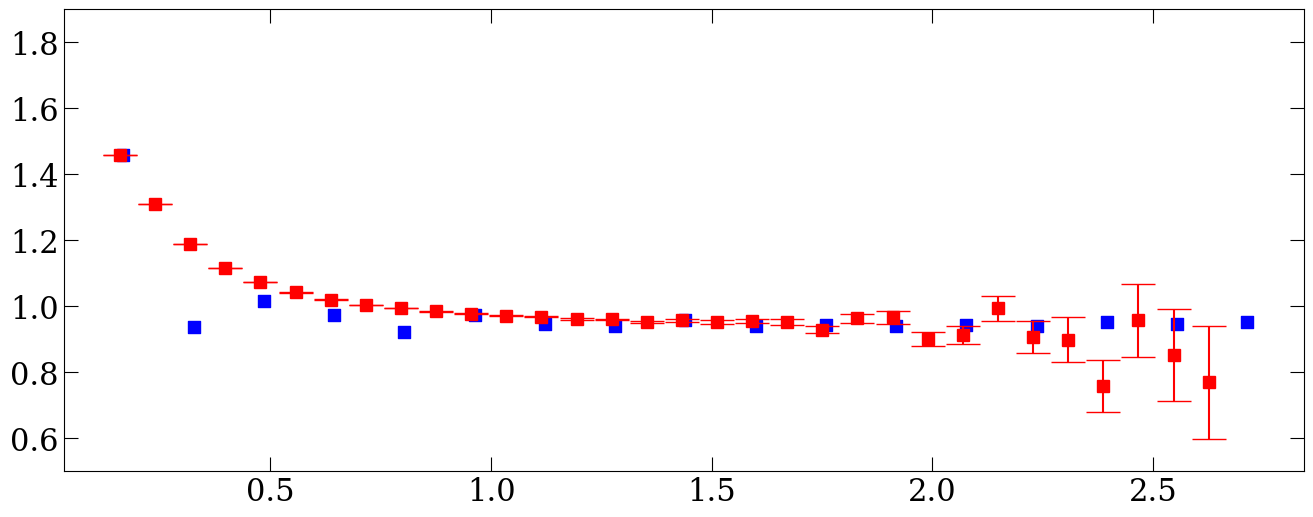

In [3]:
from scipy.linalg import solve_triangular,cholesky

def c2Hankle(c2pt,ts,shift=0):
    tmax=len(c2pt)-np.max(ts)*2 - shift
    return np.array([[[c2pt[t+i+j+shift] for i in ts] for j in ts] for t in range(tmax)])    

def run():
    xunit=ens2a[ens]; yunit=ens2aInv[ens]/1000
    fix, axs = yu.getFigAxs(1,1,Lrow=6,Lcol=16)
    ax=axs[0,0]
    ax.set_ylim([0.88,1.08])
    ax.set_ylim([0.5,1.9])
    
    c2pt_jk=data[ens]
    
    func=lambda C2pt: np.log(C2pt/np.roll(C2pt,-1,axis=0))
    mEff_jk=yu.jackmap(func,c2pt_jk)
    (mEff_mean,mEff_err)=yu.jackme(mEff_jk)
    tmin=1; tmax=32+1
    plt_x=(np.arange(tmin,tmax)+1)*xunit; plt_y=mEff_mean[tmin:tmax]*yunit; plt_err=mEff_err[tmin:tmax]*yunit
    ax.errorbar(plt_x,plt_y,plt_err,color='r',fmt='s')
    
    dt=1; shift=1
    epsilon_ZCW=1e-3
    def func(c):
        tt=[]
        for tsmax in range((len(c)-dt-shift)//2):
            # if not 0<tsmax<3:
            #     continue
            print(f't_maxused={tsmax*2+shift+dt}')
            t=c2Hankle(c,[ele for ele in range(tsmax+1)],shift=shift)
            h0=t[0]*1e9; h1=t[dt]*1e9
            t=np.linalg.inv(h0)@h1
            evl,evt=np.linalg.eig(t)
            print(h0)
            print(h1)
            print(np.linalg.eig(h0))
            print('evl',evl)
            evect=evt[:,-1]
            print('evect',evect)
            v1=evect@h1@evect;v0=evect@h0@evect
            print(v1/v0)
            
            if tsmax==2:
                evect=[0.3779285, -0.9258348, 0]
                v1=evect@h1@evect;v0=evect@h0@evect
                print(v1/v0)
            
            ZCWn=np.abs(np.atleast_2d(h0@evt)[0,:]*(np.atleast_2d(np.linalg.inv(evt))[:,0])/(h0[0,0]))
            t=[e for e,z in zip(evl,ZCWn) if z>epsilon_ZCW]
            # print(tsmax*2+shift+dt,t)
            t=[ele for ele in t if np.abs(np.imag(ele)/ele)<1e-5 and 0<np.real(ele)<1]
            # print(tsmax*2+shift+dt,t)
            t=np.max(np.real(t)) if len(t)!=0 else np.nan
            t=-np.log(t)/dt
            tt.append(t)
            print()

        return np.array(tt)
    res=func(np.mean(c2pt_jk,axis=0))
    plt_x=(np.arange(len(res))*2+shift+dt+0.1)*xunit; plt_y=res*yunit
    ax.scatter(plt_x,plt_y,color='b',marker='s')

for ens in enss[:1]:
    run()

In [54]:
def c2Hankel(c2pt,ts,shift=0):
    tmax=len(c2pt)-np.max(ts)*2 - shift
    return np.array([[[c2pt[t+i+j+shift] for i in ts] for j in ts] for t in range(tmax)])    

ens='b'
c2pt_jk=data[ens]
def func(c2pt):
    hankel=c2Hankel(c2pt,[0,1,2],shift=1)
    h0=hankel[0]; h1=hankel[1]
    # t=np.linalg.inv(h0)@h1
    evl,evt=np.linalg.eig(h0)    
    print(evl)
    # return evt[:,0]
evect=func(c2pt_jk[0])
    

[ 3.4704225e-08  7.3268652e-10 -9.6679886e-12]


[4.05190436e-01 1.01966256e-08 1.51940637e-04 1.19676687e+00
 5.71126210e-01 2.44223494e+00]
74.72315284430401 0 inf
74.71774896858776
74.7674082595588


/tmp/ipykernel_212182/3980054940.py:36: RuntimeWarning: divide by zero encountered in scalar divide
  print(np.mean(chi2_jk),Ndof,np.mean(chi2_jk)/Ndof)


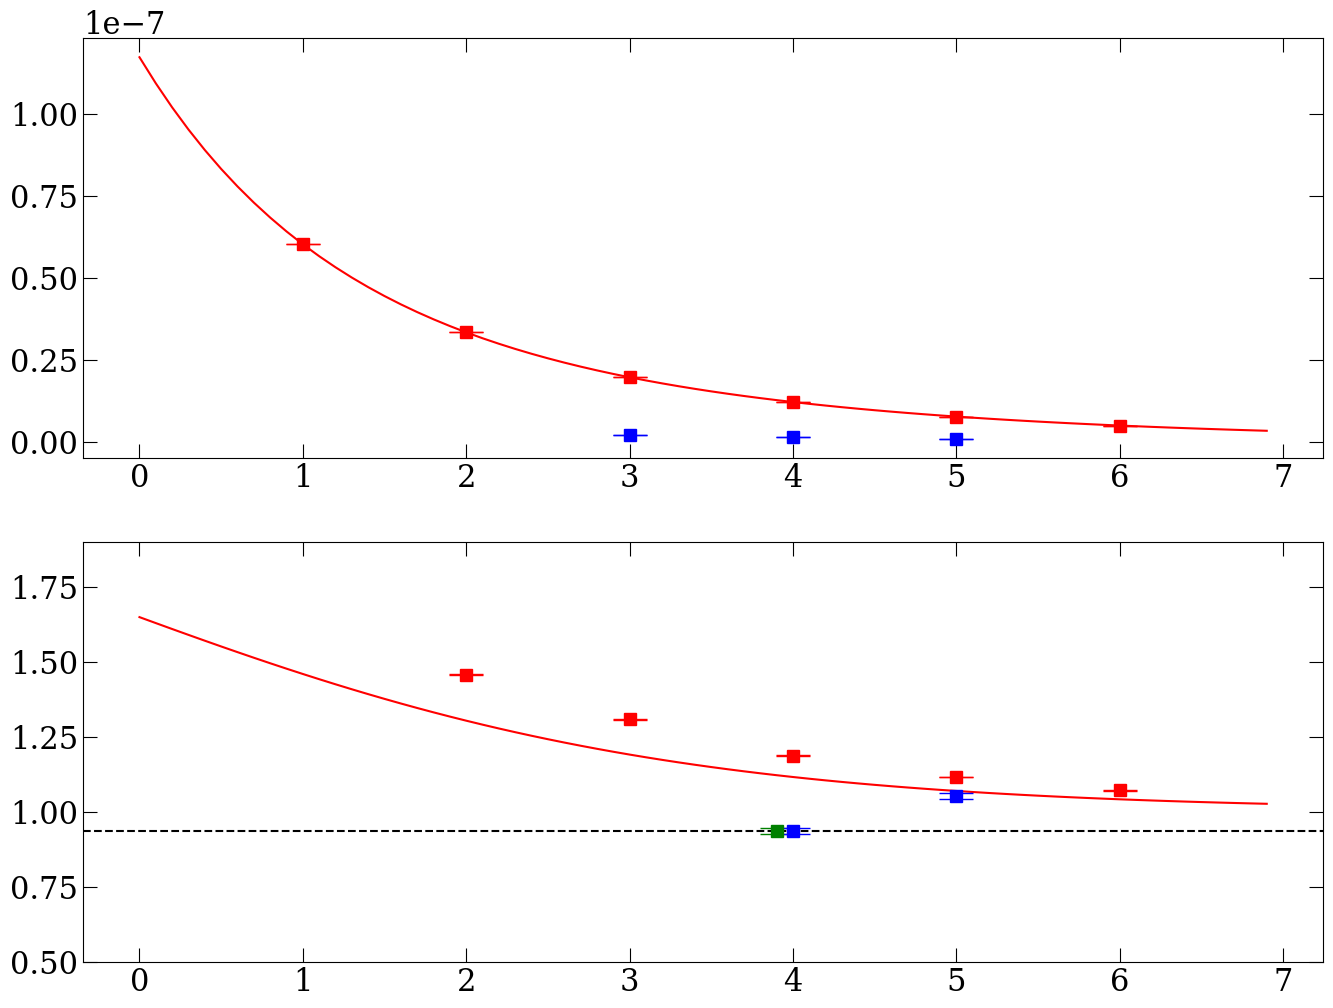

In [78]:
def c2Hankle(c2pt,ts,shift=0):
    tmax=len(c2pt)-np.max(ts)*2 - shift
    return np.array([[[c2pt[t+i+j+shift] for i in ts] for j in ts] for t in range(tmax)])    

res=None
def run():
    xunit=ens2a[ens]; yunit=ens2aInv[ens]/1000
    xunit=1
    fix, axs = yu.getFigAxs(2,1,Lrow=6,Lcol=16)
    ax=axs[1,0]
    # ax.set_ylim([0.88,1.08])
    ax.set_ylim([0.5,1.9])
    
    mN_exp=0.938; mp_exp,mn_exp=(0.93827,0.93957)
    ax.axhline(y=mN_exp,color='black',linestyle = '--', marker='')
    
    c2pt_jk=data[ens]
    
    mean,err=yu.jackme(c2pt_jk)
    tmin=1; tmax=6+1
    plt_x=(np.arange(tmin,tmax))*xunit; plt_y=mean[tmin:tmax]*yunit; plt_err=err[tmin:tmax]*yunit
    axs[0,0].errorbar(plt_x,plt_y,plt_err,color='r',fmt='s')
    # axs[0,0].set_yscale('log')    
    
    tList=np.arange(1,6+1)
    # baseFunc=lambda ts,m,c0,dE1,rc1: c0*np.exp(-m*ts)*(1+rc1*np.exp(-dE1*ts))
    baseFunc=lambda ts,m,c0,dE1,rc1,dE2,rc2: np.abs(c0)*np.exp(-np.abs(m)*ts)*(1+np.abs(rc1)*np.exp(-np.abs(dE1)*ts)+np.abs(rc2)*np.exp(-np.abs(dE1)*ts-np.abs(dE2)*ts))
    # baseFunc=lambda ts,m,c0,dE1,rc1,dE2,rc2: np.abs(c0)*np.exp(-np.abs(m)*ts)*(1+np.abs(rc1)*np.exp(-np.abs(dE1)*ts)+np.abs(rc2)*np.exp(-np.abs(dE1)*ts-np.abs(dE2)*ts))
    def fitfunc(pars):
        return baseFunc(tList,*pars)
    y_jk=c2pt_jk[:,tList]
    # pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,pars0=[4.05273387e-01, 2.23996424e-08, 5.71193430e-01, 5.04143248e-01])
    pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,pars0=[0.3, 1e-08, 0.5, 1, 1, 1])
    pars0=np.mean(pars_jk,axis=0)
    print(pars0)
    print(np.mean(chi2_jk),Ndof,np.mean(chi2_jk)/Ndof)
    
    # pars0=[4.05273389e-01, 2.23996426e-08, 5.71196351e-01, 1.11173803]
    mean,err,cov=yu.jackmec(y_jk)
    diff=fitfunc(pars0)-mean
    chi2=diff@np.linalg.inv(cov)@diff
    print(chi2)
    
    tList_plt=np.arange(0,7,0.1)
    plt_y=baseFunc(tList_plt,*pars0)*yunit
    axs[0,0].plot(tList_plt,plt_y,'r-')
    
    func=lambda C2pt: np.log(C2pt/np.roll(C2pt,-1,axis=0))
    mEff_jk=yu.jackmap(func,c2pt_jk)
    (mEff_mean,mEff_err)=yu.jackme(mEff_jk)
    tmin=1; tmax=5+1
    plt_x=(np.arange(tmin,tmax)+1)*xunit; plt_y=mEff_mean[tmin:tmax]*yunit; plt_err=mEff_err[tmin:tmax]*yunit
    ax.errorbar(plt_x,plt_y,plt_err,color='r',fmt='s')    
    
    mean,err,cov=yu.jackmec(mEff_jk[:,1:6])
    diff=np.log(baseFunc(tList,*pars0)/baseFunc(tList+1,*pars0))[:-1]-mean
    chi2=diff@np.linalg.inv(cov)@diff
    print(chi2)
    
    tList_plt=np.arange(0,7,0.1)
    plt_y=np.log(baseFunc(tList_plt,*pars0)/baseFunc(tList_plt+1,*pars0))*yunit
    ax.plot(tList_plt,plt_y,'r-')    

    ts=[0,1]
    dt=1; shift=1
    epsilon_ZCW=0.
    def func(c):
        t=c2Hankle(c,ts,shift=shift)
        h0=t[0]; h1=t[dt]
        t=np.linalg.inv(h0)@h1
        evl,evt=np.linalg.eig(t)
        ZCWn=np.abs(np.atleast_2d(h0@evt)[0,:]*(np.atleast_2d(np.linalg.inv(evt))[:,0])/(h0[0,0]))
        t=[e for e,z in zip(evl,ZCWn) if z>epsilon_ZCW]
        # t=[ele for ele in t if np.abs(np.imag(ele)/ele)<1e-5]
        # t=[ele for ele in t if np.abs(np.imag(ele)/ele)<1e-5 and 0<np.real(ele)<1]
        t=np.max(np.real(t)) if len(t)!=0 else np.nan
        t=-np.log(t)/dt
        return [t]
    t=yu.jackmap(func,c2pt_jk)
    mean,err=yu.jackme(t)
    plt_x=(4-0.1)*xunit; plt_y=mean*yunit; plt_err=err*yunit
    ax.errorbar(plt_x,plt_y,plt_err,fmt='s',color='g',mfc=None)
    
    def func(c):
        t=c2Hankle(c,ts,shift=shift)
        h0=t[0]; h1=t[dt]
        t=np.linalg.inv(h0)@h1
        evl,evt=np.linalg.eig(t)
        ZCWn=np.abs(np.atleast_2d(h0@evt)[0,:]*(np.atleast_2d(np.linalg.inv(evt))[:,0])/(h0[0,0]))
        t=[e for e,z in zip(evl,ZCWn) if z>epsilon_ZCW]
        # t=[ele for ele in t if np.abs(np.imag(ele)/ele)<1e-5]
        # t=[ele for ele in t if np.abs(np.imag(ele)/ele)<1e-5 and 0<np.real(ele)<1]
        ind=np.argmax(np.real(t))
        evect=evt[:,ind]
        t=(evect@h1@evect)/(evect@h0@evect)
        return evt[:,ind]
    evect=func(np.mean(c2pt_jk,axis=0))
    # print(evect)
    def func(c):
        hankel=c2Hankle(c,ts,shift=shift)
        t=np.real(np.einsum('i,tij,j->t',np.conj(evect),hankel,evect))
        t=-np.log(t/np.roll(t,1))
        return t[1:2+1]
    t=yu.jackmap(func,c2pt_jk)
    mean,err=yu.jackme(t)
    plt_x=(np.arange(len(mean))+4)*xunit; plt_y=mean*yunit; plt_err=err*yunit
    ax.errorbar(plt_x,plt_y,plt_err,fmt='s',color='b',mfc=None)
    
    def func(c):
        hankel=c2Hankle(c,ts,shift=shift)
        t=np.real(np.einsum('i,tij,j->t',np.conj(evect),hankel,evect))
        return t[:]
    t=yu.jackmap(func,c2pt_jk)
    mean,err=yu.jackme(t)
    tmin=0; tmax=2+1
    plt_x=(np.arange(tmin,tmax)+3)*xunit; plt_y=mean[tmin:tmax]*yunit; plt_err=err[tmin:tmax]*yunit
    axs[0,0].errorbar(plt_x,plt_y,plt_err,color='b',fmt='s')
    # axs[0,0].set_ylim([5*1e-10,5*1e-9])

for ens in enss[:1]:
    run()

[ 0.3779285 -0.9258348]
[ 0.384679  -0.9230504]
[ 0.41972518 -0.90765125]
[ 0.22251609 -0.97492903]


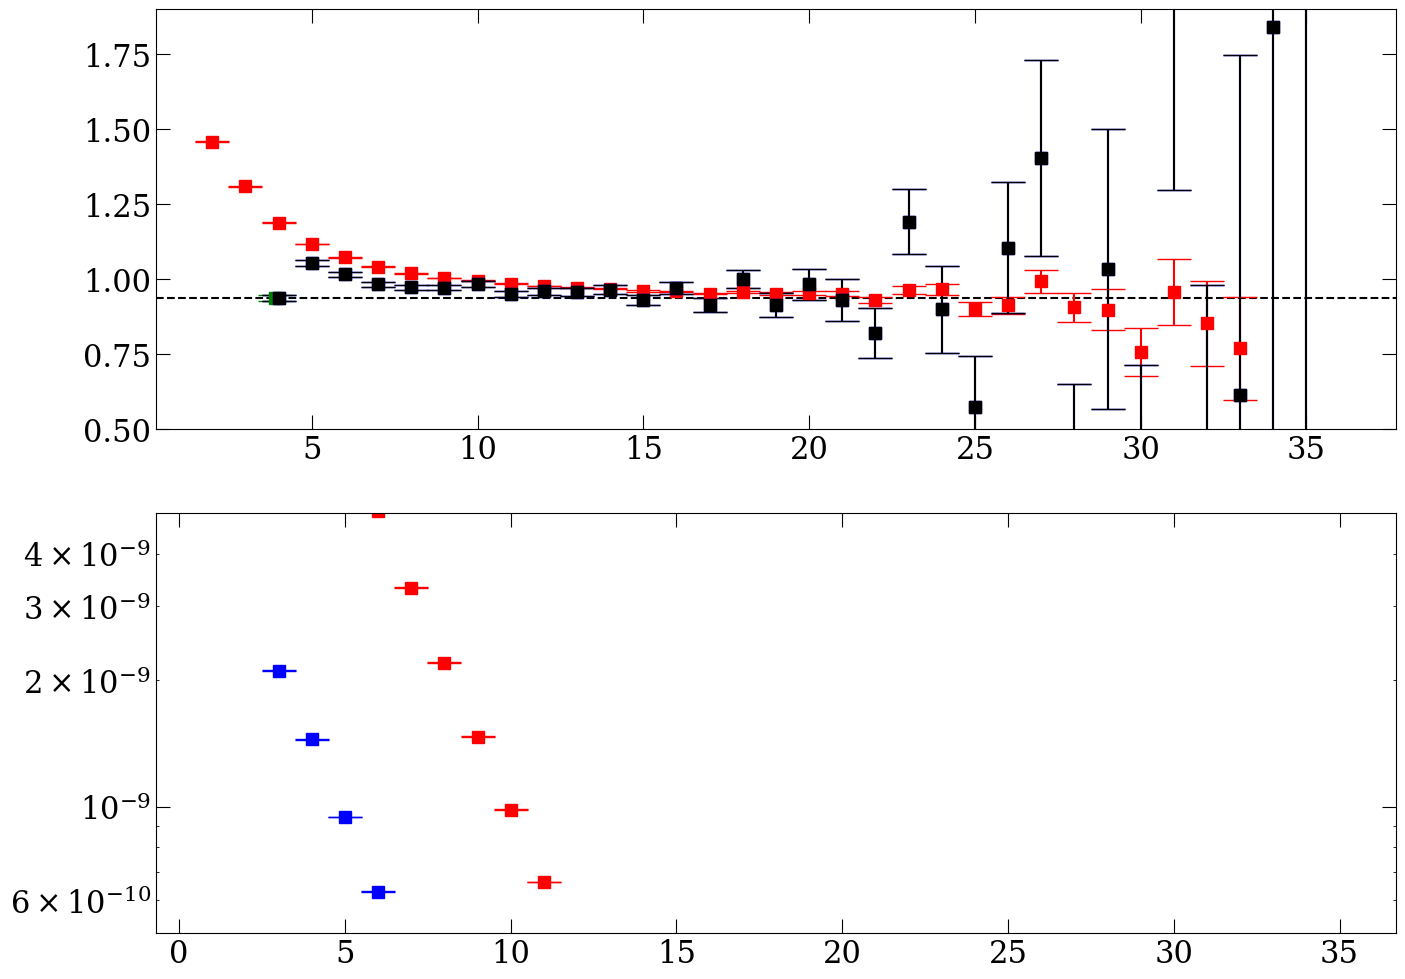

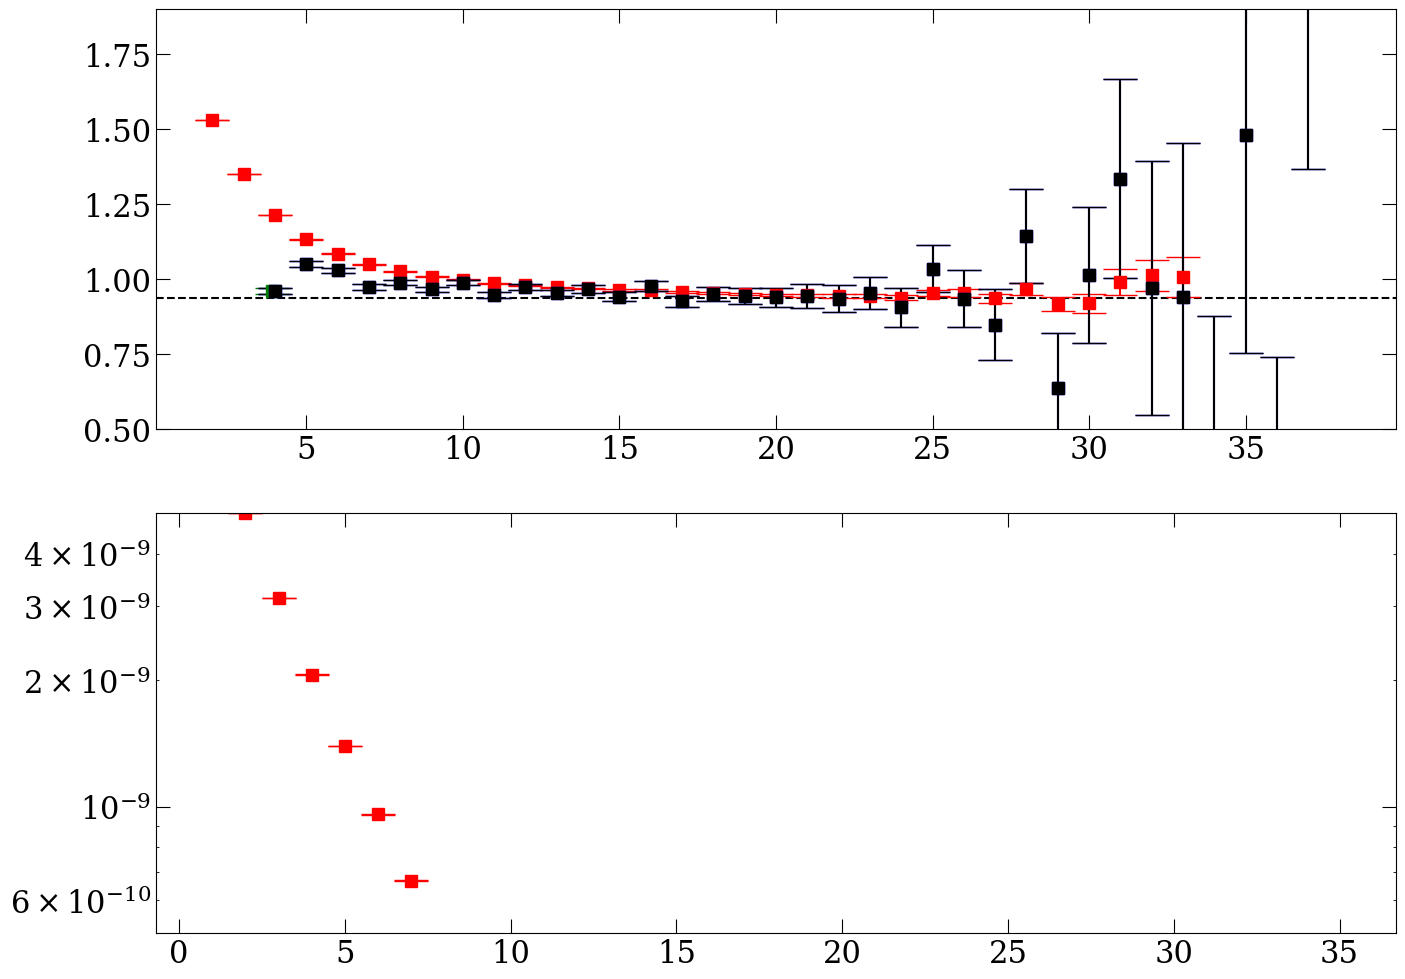

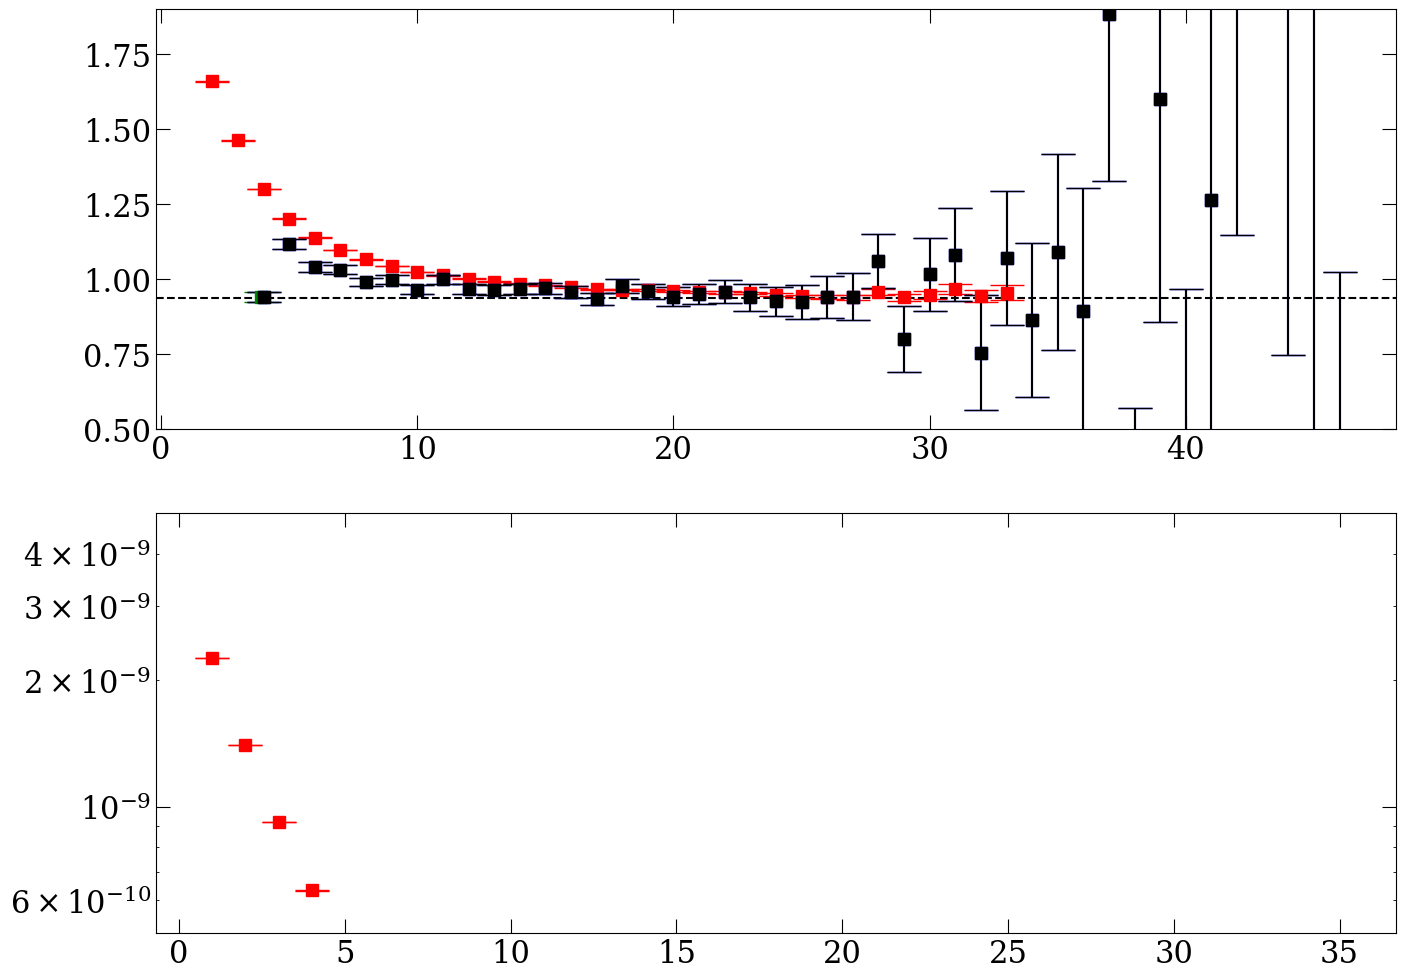

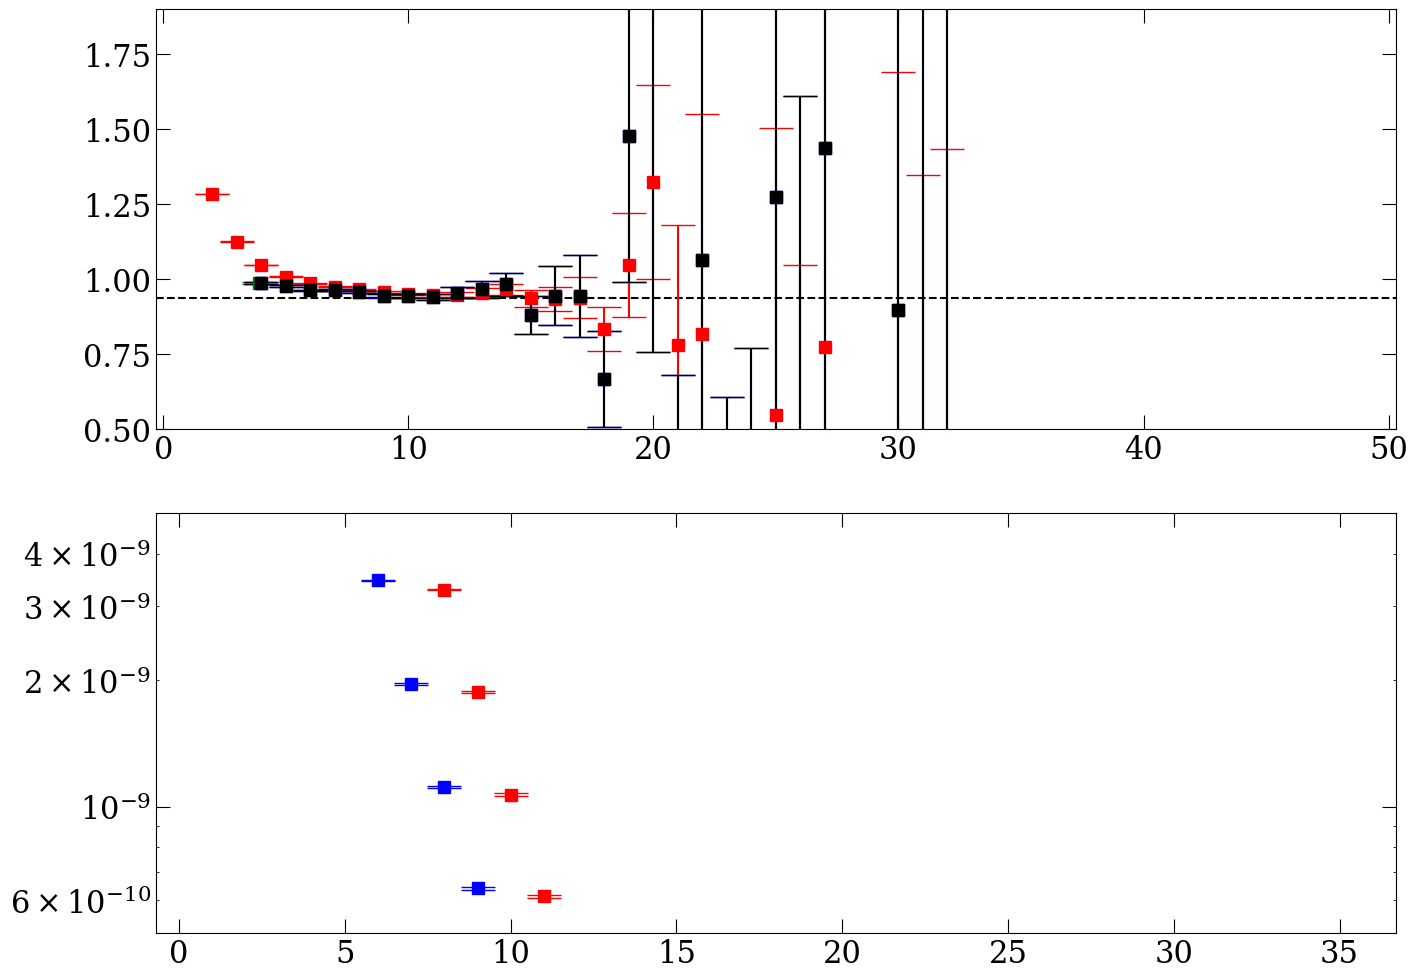

In [34]:
def c2Hankle(c2pt,ts,shift=0):
    tmax=len(c2pt)-np.max(ts)*2 - shift
    return np.array([[[c2pt[t+i+j+shift] for i in ts] for j in ts] for t in range(tmax)])    

res=None
def run():
    xunit=ens2a[ens]; yunit=ens2aInv[ens]/1000
    xunit=1
    fix, axs = yu.getFigAxs(2,1,Lrow=6,Lcol=16)
    ax=axs[0,0]
    # ax.set_ylim([0.88,1.08])
    ax.set_ylim([0.5,1.9])
    
    mN_exp=0.938; mp_exp,mn_exp=(0.93827,0.93957)
    ax.axhline(y=mN_exp,color='black',linestyle = '--', marker='')
    
    c2pt_jk=data[ens]
    
    mean,err=yu.jackme(c2pt_jk)
    tmin=1; tmax=32+1
    plt_x=(np.arange(tmin,tmax))*xunit; plt_y=mean[tmin:tmax]*yunit; plt_err=err[tmin:tmax]*yunit
    axs[1,0].errorbar(plt_x,plt_y,plt_err,color='r',fmt='s')
    axs[1,0].set_yscale('log')    
    
    func=lambda C2pt: np.log(C2pt/np.roll(C2pt,-1,axis=0))
    mEff_jk=yu.jackmap(func,c2pt_jk)
    (mEff_mean,mEff_err)=yu.jackme(mEff_jk)
    # print(mEff_mean*yunit)
    tmin=1; tmax=32+1
    plt_x=(np.arange(tmin,tmax)+1)*xunit; plt_y=mEff_mean[tmin:tmax]*yunit; plt_err=mEff_err[tmin:tmax]*yunit
    ax.errorbar(plt_x,plt_y,plt_err,color='r',fmt='s')    
    
    
    
    # plt_x=(tF[:,0]*2-1+0.1)*xunit; plt_y=tF[:,1]*yunit; plt_err=tF[:,2]*yunit
    # ax.errorbar(plt_x,plt_y,plt_err,color='black',fmt='s')
    
    ts=[0,1]
    dt=1; shift=1
    epsilon_ZCW=0.
    def func(c):
        t=c2Hankle(c,ts,shift=shift)
        h0=t[0]; h1=t[dt]
        t=np.linalg.inv(h0)@h1
        evl,evt=np.linalg.eig(t)
        ZCWn=np.abs(np.atleast_2d(h0@evt)[0,:]*(np.atleast_2d(np.linalg.inv(evt))[:,0])/(h0[0,0]))
        t=[e for e,z in zip(evl,ZCWn) if z>epsilon_ZCW]
        # t=[ele for ele in t if np.abs(np.imag(ele)/ele)<1e-5]
        # t=[ele for ele in t if np.abs(np.imag(ele)/ele)<1e-5 and 0<np.real(ele)<1]
        t=np.max(np.real(t)) if len(t)!=0 else np.nan
        t=-np.log(t)/dt
        return [t]
    t=yu.jackmap(func,c2pt_jk)
    mean,err=yu.jackme(t)
    plt_x=(4-0.1)*xunit; plt_y=mean*yunit; plt_err=err*yunit
    ax.errorbar(plt_x,plt_y,plt_err,fmt='s',color='g',mfc=None)
    
    def func(c):
        t=c2Hankle(c,ts,shift=shift)
        h0=t[0]; h1=t[dt]
        t=np.linalg.inv(h0)@h1
        evl,evt=np.linalg.eig(t)
        ZCWn=np.abs(np.atleast_2d(h0@evt)[0,:]*(np.atleast_2d(np.linalg.inv(evt))[:,0])/(h0[0,0]))
        t=[e for e,z in zip(evl,ZCWn) if z>epsilon_ZCW]
        # t=[ele for ele in t if np.abs(np.imag(ele)/ele)<1e-5]
        # t=[ele for ele in t if np.abs(np.imag(ele)/ele)<1e-5 and 0<np.real(ele)<1]
        ind=np.argmax(np.real(t))
        evect=evt[:,ind]
        t=(evect@h1@evect)/(evect@h0@evect)
        return evt[:,ind]
    evect=func(np.mean(c2pt_jk,axis=0))
    print(evect)
    def func(c):
        hankel=c2Hankle(c,ts,shift=shift)
        t=np.real(np.einsum('i,tij,j->t',np.conj(evect),hankel,evect))
        t=-np.log(t/np.roll(t,1))
        return t[1:]
    t=yu.jackmap(func,c2pt_jk)
    mean,err=yu.jackme(t)
    plt_x=(np.arange(len(mean))+4)*xunit; plt_y=mean*yunit; plt_err=err*yunit
    ax.errorbar(plt_x,plt_y,plt_err,fmt='s',color='b',mfc=None)
    
    def func(c):
        hankel=c2Hankle(c,ts,shift=shift)
        t=np.real(np.einsum('i,tij,j->t',np.conj(evect),hankel,evect))
        return t[:]
    t=yu.jackmap(func,c2pt_jk)
    mean,err=yu.jackme(t)
    tmin=0; tmax=32+1
    plt_x=(np.arange(tmin,tmax)+3)*xunit; plt_y=mean[tmin:tmax]*yunit; plt_err=err[tmin:tmax]*yunit
    axs[1,0].errorbar(plt_x,plt_y,plt_err,color='b',fmt='s')
    axs[1,0].set_ylim([5*1e-10,5*1e-9])
    
    func=lambda C2pt: np.log(C2pt/np.roll(C2pt,-1,axis=0))
    t=yu.jackmap(func,t)
    mean,err=yu.jackme(t)
    plt_x=(np.arange(len(mean))+4)*xunit; plt_y=mean*yunit; plt_err=err*yunit
    ax.errorbar(plt_x,plt_y,plt_err,fmt='s',color='black',mfc=None)
    
for ens in ['b','c','d','A15']:
    run()

In [26]:
path='/capstor/store/cscs/userlab/s1174/lyan/code/temp/temp'
with open(path,'r') as f:
    tF=f.read().split('\n')
tF=np.array([[float(ele) for ele in row.split(' ')[1:-1]] for row in tF])

[ 0.18421753 -0.52520794  0.8307951 ]
[35.532757] [154.82037]
[[2.4319402e-08 1.3503651e-08]
 [1.3503651e-08 7.9642160e-09]]
[3.1928561e-08 3.5505468e-10]
[[1.3503651e-08 7.9642160e-09]
 [7.9642160e-09 4.9321023e-09]]
[1.8262023e-08 1.7372941e-10]
[0.4082044  0.68560135]
[[-0.5654639  0.3779285]
 [ 0.8247731 -0.9258348]]
[0.4082044  0.68560135]
0.68560135


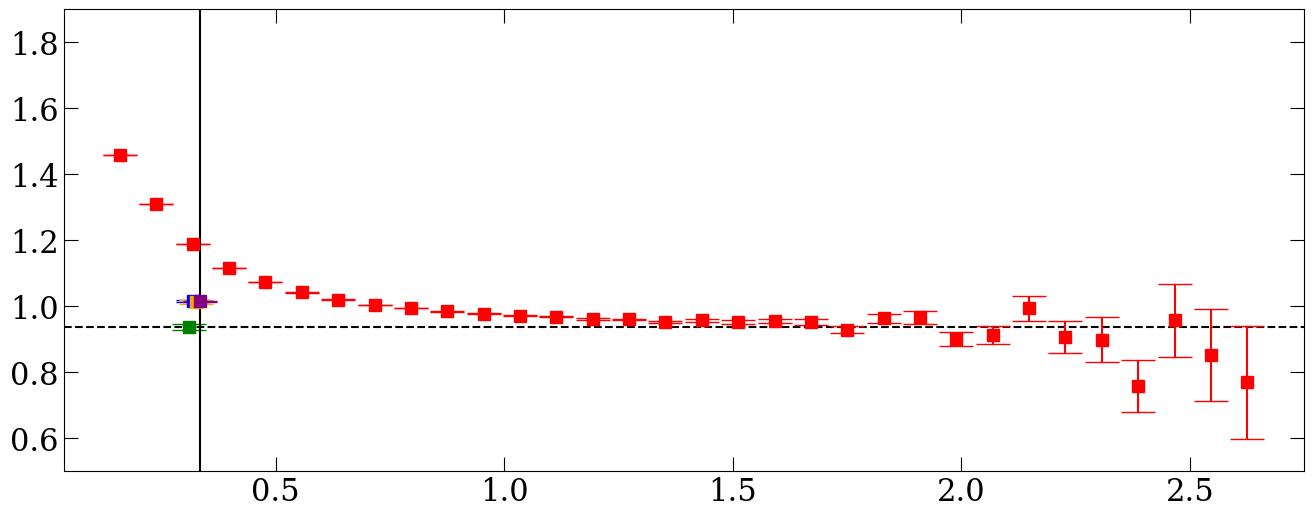

In [26]:
def c2Hankle(c2pt,ts,shift=0):
    tmax=len(c2pt)-np.max(ts)*2 - shift
    return np.array([[[c2pt[t+i+j+shift] for i in ts] for j in ts] for t in range(tmax)])    

res=None
def run():
    xunit=ens2a[ens]; yunit=ens2aInv[ens]/1000
    fix, axs = yu.getFigAxs(1,1,Lrow=6,Lcol=16)
    ax=axs[0,0]
    # ax.set_ylim([0.88,1.08])
    ax.set_ylim([0.5,1.9])
    
    mN_exp=0.938; mp_exp,mn_exp=(0.93827,0.93957)
    ax.axhline(y=mN_exp,color='black',linestyle = '--', marker='')
    
    c2pt_jk=data[ens]
    
    func=lambda C2pt: np.log(C2pt/np.roll(C2pt,-1,axis=0))
    mEff_jk=yu.jackmap(func,c2pt_jk)
    (mEff_mean,mEff_err)=yu.jackme(mEff_jk)
    tmin=1; tmax=32+1
    plt_x=(np.arange(tmin,tmax)+1)*xunit; plt_y=mEff_mean[tmin:tmax]*yunit; plt_err=mEff_err[tmin:tmax]*yunit
    ax.errorbar(plt_x,plt_y,plt_err,color='r',fmt='s')    
    
    # plt_x=(tF[:,0]*2-1+0.1)*xunit; plt_y=tF[:,1]*yunit; plt_err=tF[:,2]*yunit
    # ax.errorbar(plt_x,plt_y,plt_err,color='black',fmt='s')
    
    dt=1; shift=1
    epsilon_ZCW=0.
    def func(c):
        t=c2Hankle(c,[0,1],shift=shift)
        h0=t[0]; h1=t[dt]
        t=np.linalg.inv(h0)@h1
        evl,evt=np.linalg.eig(t)
        ZCWn=np.abs(np.atleast_2d(h0@evt)[0,:]*(np.atleast_2d(np.linalg.inv(evt))[:,0])/(h0[0,0]))
        t=[e for e,z in zip(evl,ZCWn) if z>epsilon_ZCW]
        # t=[ele for ele in t if np.abs(np.imag(ele)/ele)<1e-5]
        # t=[ele for ele in t if np.abs(np.imag(ele)/ele)<1e-5 and 0<np.real(ele)<1]
        t=np.max(np.real(t)) if len(t)!=0 else np.nan
        t=-np.log(t)/dt
        return [t]
    t=yu.jackmap(func,c2pt_jk)
    mean,err=yu.jackme(t)
    plt_x=(4-0.1)*xunit; plt_y=mean*yunit; plt_err=err*yunit
    ax.errorbar(plt_x,plt_y,plt_err,fmt='s',color='g',mfc=None)
    
    dt=1; shift=1
    def func(c):
        t=c2Hankle(c,[0,1,2],shift=shift)
        h0=t[0]; h1=t[dt]
        t=np.linalg.inv(h0)@h1
        evl,evt=np.linalg.eig(t)
        ZCWn=np.abs(np.atleast_2d(h0@evt)[0,:]*(np.atleast_2d(np.linalg.inv(evt))[:,0])/(h0[0,0]))
        t=[e for e,z in zip(evl,ZCWn) if z>epsilon_ZCW]
        # t=[ele for ele in t if np.abs(np.imag(ele)/ele)<1e-5]
        # t=[ele for ele in t if np.abs(np.imag(ele)/ele)<1e-5 and 0<np.real(ele)<1]
        t=np.max(np.real(t)) if len(t)!=0 else np.nan
        t=-np.log(t)/dt
        return [t]
    t=yu.jackmap(func,c2pt_jk)
    mean,err=yu.jackme(t)
    plt_x=(4)*xunit; plt_y=mean*yunit; plt_err=err*yunit
    ax.errorbar(plt_x,plt_y,plt_err,fmt='s',color='b',mfc=None)
    
    dt=1; shift=1
    def func(c):
        t=c2Hankle(c,[1,2],shift=shift)
        h0=t[0]; h1=t[dt]
        t=np.linalg.inv(h0)@h1
        evl,evt=np.linalg.eig(t)
        ZCWn=np.abs(np.atleast_2d(h0@evt)[0,:]*(np.atleast_2d(np.linalg.inv(evt))[:,0])/(h0[0,0]))
        t=[e for e,z in zip(evl,ZCWn) if z>epsilon_ZCW]
        # t=[ele for ele in t if np.abs(np.imag(ele)/ele)<1e-5]
        # t=[ele for ele in t if np.abs(np.imag(ele)/ele)<1e-5 and 0<np.real(ele)<1]
        t=np.max(np.real(t)) if len(t)!=0 else np.nan
        t=-np.log(t)/dt
        return [t]
    t=yu.jackmap(func,c2pt_jk)
    mean,err=yu.jackme(t)
    plt_x=(4+0.1)*xunit; plt_y=mean*yunit; plt_err=err*yunit
    ax.errorbar(plt_x,plt_y,plt_err,fmt='s',color='orange',mfc=None)
    
    dt=1; shift=1
    def func(c):
        t=c2Hankle(c,[0,2],shift=shift)
        h0=t[0]; h1=t[dt]
        t=np.linalg.inv(h0)@h1
        evl,evt=np.linalg.eig(t)
        ZCWn=np.abs(np.atleast_2d(h0@evt)[0,:]*(np.atleast_2d(np.linalg.inv(evt))[:,0])/(h0[0,0]))
        t=[e for e,z in zip(evl,ZCWn) if z>epsilon_ZCW]
        # t=[ele for ele in t if np.abs(np.imag(ele)/ele)<1e-5]
        # t=[ele for ele in t if np.abs(np.imag(ele)/ele)<1e-5 and 0<np.real(ele)<1]
        t=np.max(np.real(t)) if len(t)!=0 else np.nan
        t=-np.log(t)/dt
        return [t]
    t=yu.jackmap(func,c2pt_jk)
    mean,err=yu.jackme(t)
    plt_x=(4+0.2)*xunit; plt_y=mean*yunit; plt_err=err*yunit
    ax.errorbar(plt_x,plt_y,plt_err,fmt='s',color='purple',mfc=None)
    
    dt=1; shift=1
    def func(c):
        t=c2Hankle(c,[0,1,4],shift=shift)
        h0=t[0]; h1=t[dt]
        t=np.linalg.inv(h0)@h1
        evl,evt=np.linalg.eig(t)
        ZCWn=np.abs(np.atleast_2d(h0@evt)[0,:]*(np.atleast_2d(np.linalg.inv(evt))[:,0])/(h0[0,0]))
        t=[e for e,z in zip(evl,ZCWn) if z>epsilon_ZCW]
        # t=[ele for ele in t if np.abs(np.imag(ele)/ele)<1e-5]
        # t=[ele for ele in t if np.abs(np.imag(ele)/ele)<1e-5 and 0<np.real(ele)<1]
        ind=np.argmax(np.real(t))
        return evt[:,ind]
    evect=func(np.mean(c2pt_jk,axis=0))
    print(evect)
    def func(c):
        t=c2Hankle(c,[0,1,4],shift=shift)
        h0=t[0]; h1=t[dt]
        t=np.linalg.inv(h0)@h1
        evl,evt=np.linalg.eig(t)
        # ZCWn=np.abs(np.atleast_2d(h0@evt)[0,:]*(np.atleast_2d(np.linalg.inv(evt))[:,0])/(h0[0,0]))
        # t=[e for e,z in zip(evl,ZCWn) if z>epsilon_ZCW]
        # # t=[ele for ele in t if np.abs(np.imag(ele)/ele)<1e-5]
        # # t=[ele for ele in t if np.abs(np.imag(ele)/ele)<1e-5 and 0<np.real(ele)<1]
        # t=np.max(np.real(t)) if len(t)!=0 else np.nan
        # t=-np.log(t)/dt
        
        t=(evect@h1@evect)/(evect@h0@evect)
        return [t]
    t=yu.jackmap(func,c2pt_jk)
    mean,err=yu.jackme(t)
    print(mean,err)
    plt_x=(4+0.2)*xunit; plt_y=mean*yunit; plt_err=err*yunit
    ax.errorbar(plt_x,plt_y,plt_err,fmt='s',color='black',mfc=None)

    dt=1; shift=1
    res=[]
    def func(c):
        t=c2Hankle(c,[0,1],shift=shift)
        h0=t[0]; h1=t[dt]
        
        evl,evt=np.linalg.eig(h0)
        print(h0)
        print(evl)
        evl,evt=np.linalg.eig(h1)
        print(h1)
        print(evl)

        t=np.linalg.inv(h0[:2,:2])@h1[:2,:2]
        evl,evt=np.linalg.eig(t)
        print(evl)
        print(evt)

        t=np.linalg.inv(h0)@h1
        evl,evt=np.linalg.eig(t)
        print(evl)
        
        
        
        res.append(evl)
        ZCWn=np.abs(np.atleast_2d(h0@evt)[0,:]*(np.atleast_2d(np.linalg.inv(evt))[:,0])/(h0[0,0]))
        t=[e for e,z in zip(evl,ZCWn) if z>epsilon_ZCW]
        # t=[ele for ele in t if np.abs(np.imag(ele)/ele)<1e-5 and 0<np.real(ele)<1]
        t=np.max(np.real(t)) if len(t)!=0 else np.nan
        print(t)
        t=-np.log(t)/dt
        return [t]
    func(np.mean(c2pt_jk,axis=0))


for ens in enss[:1]:
    run()

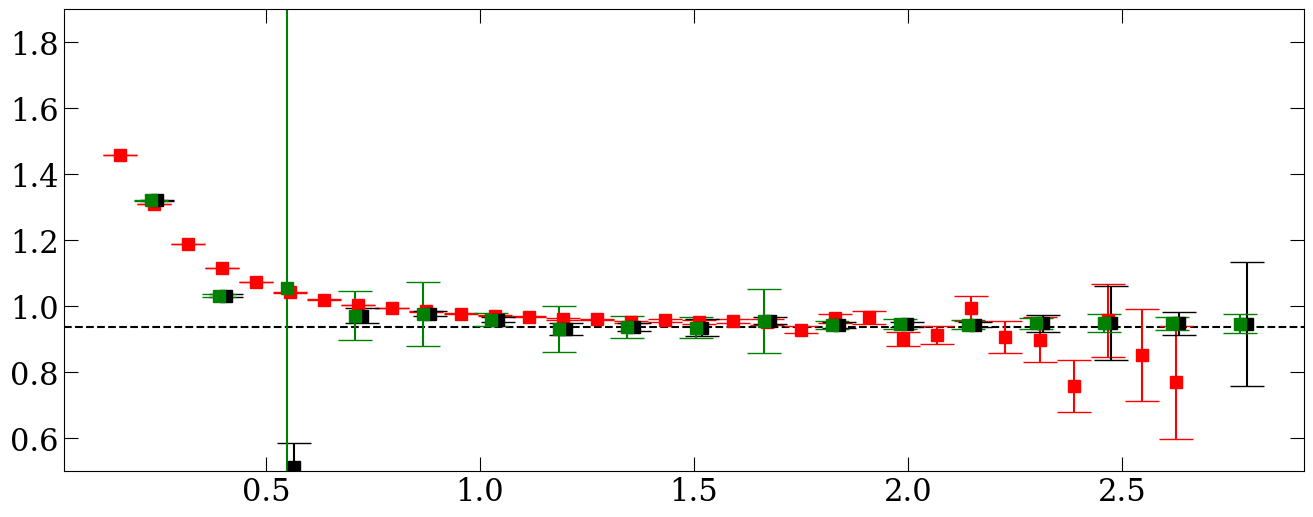

In [27]:
def c2Hankle(c2pt,ts,shift=0):
    tmax=len(c2pt)-np.max(ts)*2 - shift
    return np.array([[[c2pt[t+i+j+shift] for i in ts] for j in ts] for t in range(tmax)])    

res=None
def run():
    xunit=ens2a[ens]; yunit=ens2aInv[ens]/1000
    fix, axs = yu.getFigAxs(1,1,Lrow=6,Lcol=16)
    ax=axs[0,0]
    ax.set_ylim([0.88,1.08])
    ax.set_ylim([0.5,1.9])
    
    mN_exp=0.938; mp_exp,mn_exp=(0.93827,0.93957)
    ax.axhline(y=mN_exp,color='black',linestyle = '--', marker='')
    
    c2pt_jk=data[ens]
    
    func=lambda C2pt: np.log(C2pt/np.roll(C2pt,-1,axis=0))
    mEff_jk=yu.jackmap(func,c2pt_jk)
    (mEff_mean,mEff_err)=yu.jackme(mEff_jk)
    tmin=1; tmax=32+1
    plt_x=(np.arange(tmin,tmax)+1)*xunit; plt_y=mEff_mean[tmin:tmax]*yunit; plt_err=mEff_err[tmin:tmax]*yunit
    ax.errorbar(plt_x,plt_y,plt_err,color='r',fmt='s')
    
    
    plt_x=(tF[:,0]*2-1+0.1)*xunit; plt_y=tF[:,1]*yunit; plt_err=tF[:,2]*yunit
    ax.errorbar(plt_x,plt_y,plt_err,color='black',fmt='s')
    
    dt=1; shift=0
    
    # epsilon_ZCW=0.
    # def func(c):
    #     tt=[]
    #     for tsmax in range((len(c)-dt-shift)//2):
    #         t=c2Hankle(c,range(tsmax+1),shift=shift)
    #         h0=t[0]; h1=t[dt]
    #         t=np.linalg.inv(h0)@h1
    #         evl,evt=np.linalg.eig(t)
    #         ZCWn=np.abs(np.atleast_2d(h0@evt)[0,:]*(np.atleast_2d(np.linalg.inv(evt))[:,0])/(h0[0,0]))
    #         t=[e for e,z in zip(evl,ZCWn) if z>epsilon_ZCW]
    #         # t=[ele for ele in t if np.imag(ele)==0 and np.real(ele)<1]
    #         t=np.max(np.real(t)) if len(t)!=0 else np.nan
    #         t=-np.log(t)/dt
    #         tt.append(t)
    #     return np.array(tt)
    # t=yu.jackmap(func,c2pt_jk)
    # # global res
    # # res=t
    # mean,err=yu.jackme(t)
    # plt_x=(np.arange(len(mean))*2+shift+dt-0.1)*xunit; plt_y=mean*yunit; plt_err=err*yunit
    # ax.errorbar(plt_x,plt_y,plt_err,fmt='s',color='g',mfc=None)
    
    # epsilon_ZCW=0.
    # def func(c):
    #     tt=[]
    #     for tsmax in range((len(c)-dt-shift)//2):
    #         t=c2Hankle(c,range(tsmax+1),shift=shift)
    #         h0=t[0]; h1=t[dt]
    #         t=np.linalg.inv(h0)@h1
    #         evl,evt=np.linalg.eig(t)
    #         ZCWn=np.abs(np.atleast_2d(h0@evt)[0,:]*(np.atleast_2d(np.linalg.inv(evt))[:,0])/(h0[0,0]))
    #         t=[e for e,z in zip(evl,ZCWn) if z>epsilon_ZCW]
    #         t=[ele for ele in t if np.abs(np.imag(ele)/ele)<1e-5 and 0<np.real(ele)<1]
    #         t=np.max(np.real(t)) if len(t)!=0 else np.nan
    #         t=-np.log(t)/dt
    #         tt.append(t)
    #     return np.array(tt)
    # t=yu.jackmap(func,c2pt_jk)
    # mean,err=yu.jackme(t)
    # plt_x=(np.arange(len(mean))*2+shift+dt+0.1)*xunit; plt_y=mean*yunit; plt_err=err*yunit
    # ax.errorbar(plt_x,plt_y,plt_err,fmt='s',color='b',mfc=None)
    
    epsilon_ZCW=0.1
    def func(c):
        tt=[]
        for tsmax in range((len(c)-dt-shift+1)//2):
            t=c2Hankle(c,range(tsmax+1),shift=shift)
            h0=t[0]; h1=t[dt]
            t=np.linalg.inv(h0)@h1
            evl,evt=np.linalg.eig(t)
            ZCWn=np.abs(np.atleast_2d(h0@evt)[0,:]*(np.atleast_2d(np.linalg.inv(evt))[:,0])/(h0[0,0]))
            t=[e for e,z in zip(evl,ZCWn) if z>epsilon_ZCW]
            t=[ele for ele in t if np.abs(np.imag(ele)/ele)<1e-5 and 0<np.real(ele)<1]
            t=np.max(np.real(t)) if len(t)!=0 else np.nan
            t=-np.log(t)/dt
            tt.append(t)
        return np.array(tt)
    t=yu.jackmap(func,c2pt_jk)
    global res
    res=t
    mean,err=yu.jackme(t)
    plt_x=(np.arange(len(mean))*2+shift+dt-0.1)*xunit; plt_y=mean*yunit; plt_err=err*yunit
    ax.errorbar(plt_x,plt_y,plt_err,fmt='s',color='g',mfc=None)
    

    # def func(c):
    #     tt={}
    #     for tsmax in range((len(c)-dt-shift)//2):
    #         t=c2Hankle(c,range(tsmax+1),shift=shift)
    #         h0=t[0]; h1=t[dt]
    #         t=np.linalg.inv(h0)@h1
    #         evl,evt=np.linalg.eig(t)
    #         ZCWn=np.abs(np.atleast_2d(h0@evt)[0,:]*(np.atleast_2d(np.linalg.inv(evt))[:,0])/(h0[0,0]))
    #         t=[e for e,z in zip(evl,ZCWn) if z>epsilon_ZCW]
    #         t=[ele for ele in t if np.abs(np.imag(ele)/ele)<1e-5 and 0<np.real(ele)<1]
    #         t=np.max(np.real(t)) if len(t)!=0 else np.nan
    #         ind=0
    #         for i,ele in enumerate(evl):
    #             if ele==t:
    #                 ind=i
    #                 break
    #         tt[tsmax]=evt[:,ind]
    #     return tt
    # evts=func(np.mean(c2pt_jk,axis=0))    
    # def func(c):
    #     tt=[]
    #     for tsmax in range((len(c)-dt-shift)//2):
    #         t=c2Hankle(c,range(tsmax+1),shift=shift)
    #         h0=t[0]; h1=t[dt]
    #         evect=evts[tsmax]
    #         t=np.real(np.conj(evect)@h1@evect)/np.real(np.conj(evect)@h0@evect)
    #         t=-np.log(t)/dt
    #         tt.append(t)
    #     return np.array(tt)
    # t=yu.jackmap(func,c2pt_jk)
    # mean,err=yu.jackme(t)
    # plt_x=(np.arange(len(mean))*2+shift+dt+0.3)*xunit; plt_y=mean*yunit; plt_err=err*yunit
    # ax.errorbar(plt_x,plt_y,plt_err,fmt='s',color='b',mfc=None)
    
    
    # colors=['r','g','b']
    # for i,ts in enumerate([[0],[0,2],[0,2,4]]):
    #     t0,t=3,6
    #     hankel=c2Hankle(np.mean(c2pt_jk,axis=0),ts)[1:]
    #     evals,evecs = yu.GEVP(hankel,t0,tList=[t])
    #     evec=evecs[0,0:1]
    #     evec=evec/np.linalg.norm(evec)
    #     print(evec)
    #     def func(c2pt):
    #         hankel=c2Hankle(c2pt,ts)[1:]
    #         c=np.real((np.conj(evec)@hankel@evec.T)[:,0,0])
    #         meff=np.log(c/np.roll(c,-1))
    #         return meff
        
    #     # t0=1
    #     # def func(c2pt):
    #     #     hankel=c2Hankle(c2pt,ts)[1:]
    #     #     evals,evecs = yu.GEVP(hankel,t0)
    #     #     meff=np.log(evals/np.roll(evals,-1,axis=0))[:,0]
    #     #     return meff
        
    #     meff_jk=yu.jackmap(func,c2pt_jk)
    #     mean,err=yu.jackme(meff_jk)
    #     t_maxused=np.array([2*np.max(ts)+t+1 for t in range(1,len(mean)+1)])
    #     plt_x=t_maxused*xunit; plt_y=mean*yunit; plt_err=err*yunit
    #     ax.errorbar(plt_x,plt_y,plt_err,fmt='s',color=colors[i],mfc=None)

for ens in enss[:1]:
    run()

[3.78586087e-01 1.55169822e-08 1.75839389e-01 7.12656172e-01
 7.46614933e-01 4.33587603e+00 1.20000000e+00 1.00000000e+00]


/capstor/store/cscs/userlab/s1174/lyan/code/glwc2/project2/01_Nsgm/util.py:116: RuntimeWarning: Number of calls to function has reached maxfev = 1800.
  pars=leastsq(fitfunc_wrapper2,pars_mean)[0]


[ 3.82798416e-01  1.71009112e-08  2.50414524e-01  8.06725885e-01
  9.58035578e+00 -5.97204629e+02  8.70110504e-01  1.18882797e+00]


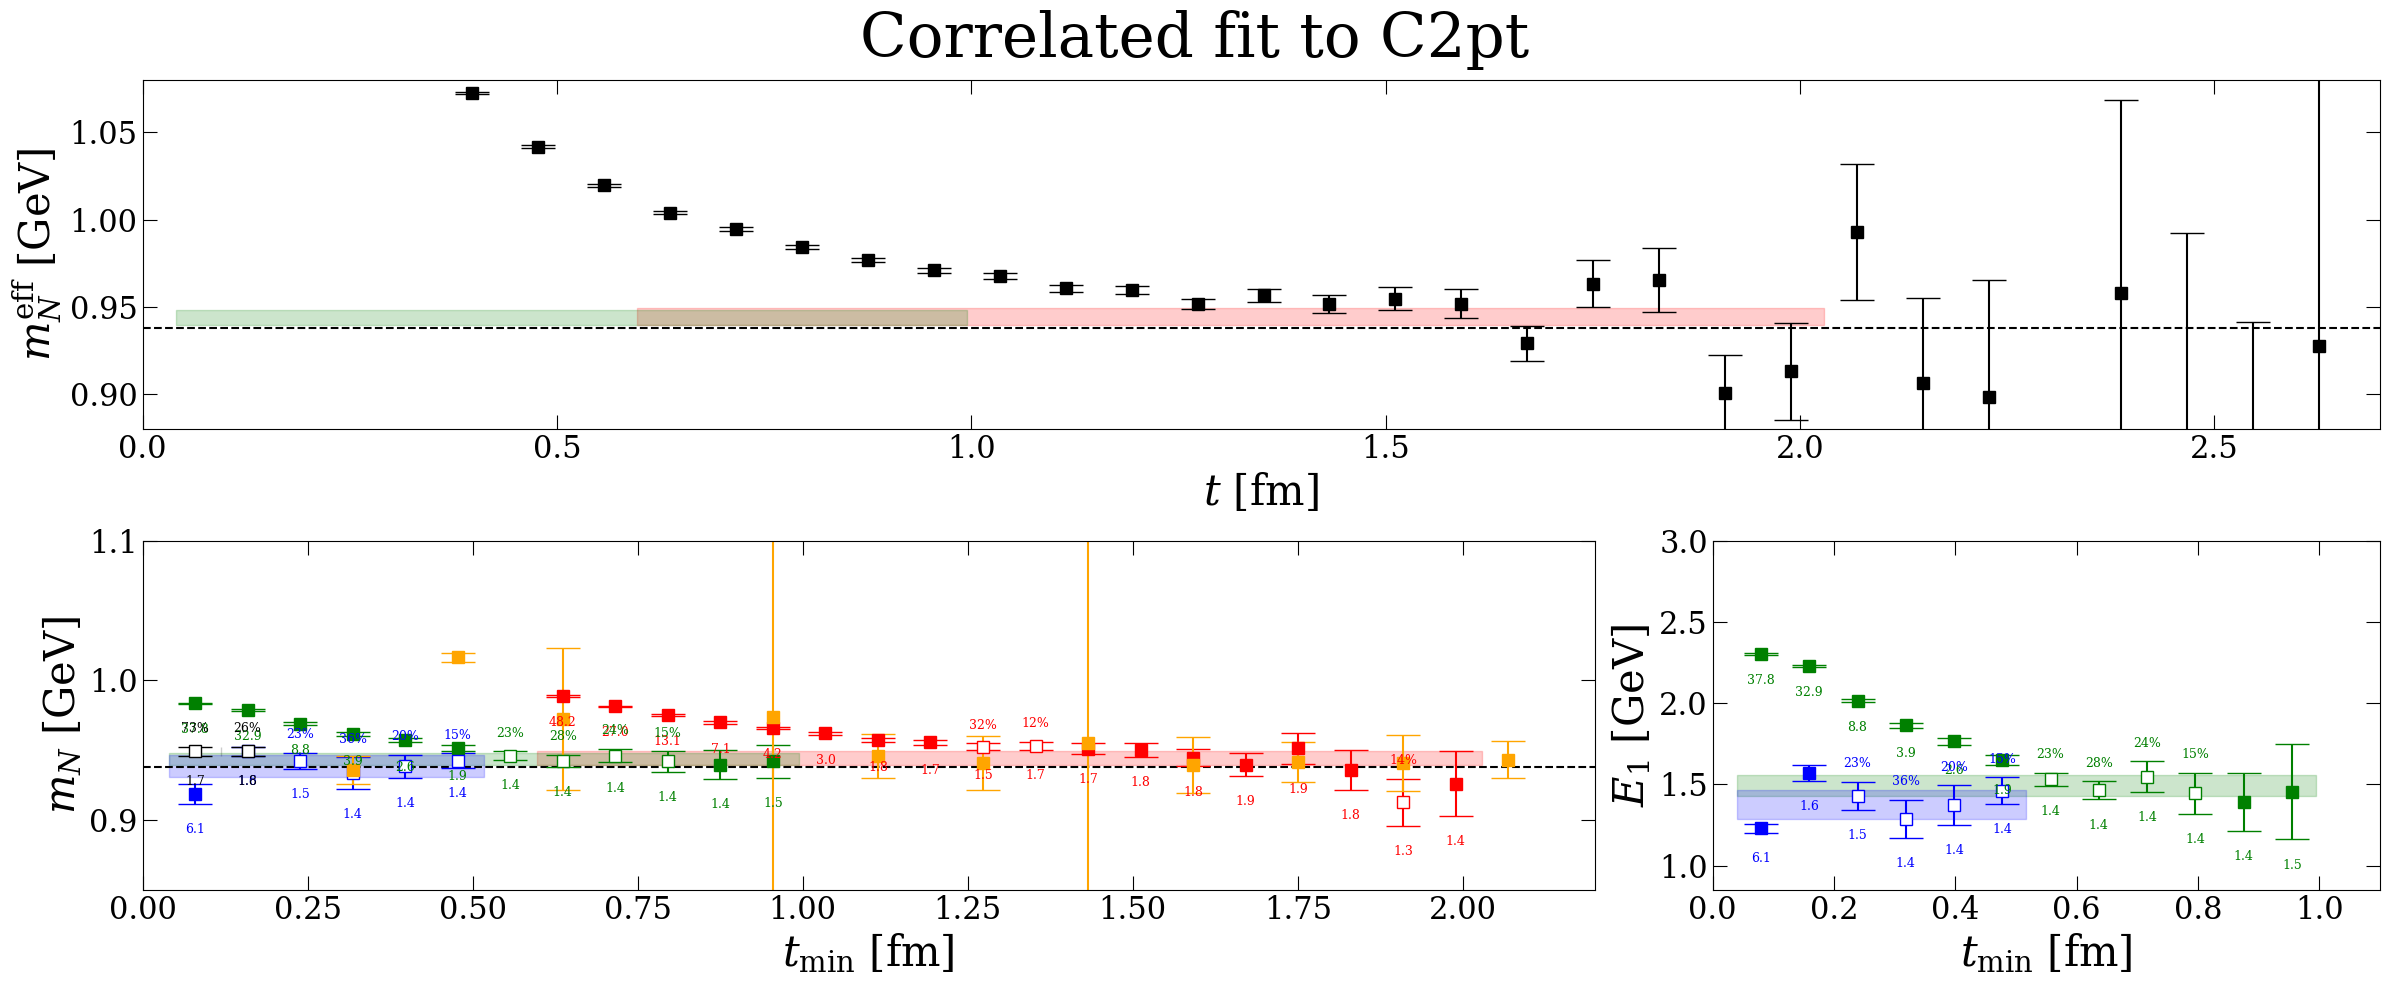

In [33]:
def c2Hankle(c,ts,shift=0):
    tmax=len(c)-np.max(ts)*2 - shift
    return np.array([[[c[t+i+j+shift] for i in ts] for j in ts] for t in range(tmax)])    

propThreshold=0.1
# propThreshold=None

chi2Size=9
settings={}

func_C2pt_1st=lambda t,E0,c0: c0*np.exp(-E0*t)
func_C2pt_2st=lambda t,E0,c0,dE1,rc1: c0*np.exp(-E0*t)*(1 + rc1*np.exp(-dE1*t))
func_C2pt_3st=lambda t,E0,c0,dE1,rc1,dE2,rc2: c0*np.exp(-E0*t)*(1 + rc1*np.exp(-dE1*t) + rc2*np.exp(-dE2*t))
func_C2pt_4st=lambda t,E0,c0,dE1,rc1,dE2,rc2,dE3,rc3: c0*np.exp(-E0*t)*(1 + rc1*np.exp(-dE1*t) + rc2*np.exp(-dE2*t) + rc3*np.exp(-dE3*t))
func_mEff_1st=lambda t,E0: np.log(func_C2pt_1st(t,E0,1)/func_C2pt_1st(t+1,E0,1))
func_mEff_2st=lambda t,E0,dE1,rc1: np.log(func_C2pt_2st(t,E0,1,dE1,rc1)/func_C2pt_2st(t+1,E0,1,dE1,rc1))
func_mEff_3st=lambda t,E0,dE1,rc1,dE2,rc2: np.log(func_C2pt_3st(t,E0,1,dE1,rc1,dE2,rc2)/func_C2pt_3st(t+1,E0,1,dE1,rc1,dE2,rc2))

def run(corrQ=False,meffQ=True,pdf=None):
    xunit=ens2a[ens]; yunit=ens2aInv[ens]/1000
    fig, axd = plt.subplot_mosaic([['f1','f1','f1'],['f2','f2','f3']],figsize=(24,10))
    (ax1,ax2,ax3)=(axd[key] for key in ['f1','f2','f3'])
    if meffQ:
        fig.suptitle('Correlated fit to meff' if corrQ else 'Uncorrelated fit to meff',fontsize=44)
    else:
        fig.suptitle('Correlated fit to C2pt' if corrQ else 'Uncorrelated fit to C2pt',fontsize=44)
    
    ax1.set_xlabel(r'$t$ [fm]')
    ax2.set_xlabel(r'$t_{\mathrm{min}}$ [fm]')
    ax3.set_xlabel(r'$t_{\mathrm{min}}$ [fm]')
    ax1.set_ylabel(r'$m_N^{\mathrm{eff}}$ [GeV]')
    ax2.set_ylabel(r'$m_N$ [GeV]')
    ax3.set_ylabel(r'$E_1$ [GeV]')
    ax1.set_ylim(settings['ylim1'])
    ax2.set_ylim(settings['ylim2'])
    # ax2.set_ylim([0.8,1.2])
    ax3.set_ylim(settings['ylim3'])
    ax1.set_xlim(settings['xlim1'])
    ax2.set_xlim(settings['xlim2'])
    ax3.set_xlim(settings['xlim3'])
    
    mN_exp=0.938; mp_exp,mn_exp=(0.93827,0.93957)
    ax1.axhline(y=mN_exp,color='black',linestyle = '--', marker='')
    ax2.axhline(y=mN_exp,color='black',linestyle = '--', marker='', label=r'$m_N^{\mathrm{exp}}=$'+'%0.3f'%mN_exp)
    C2pt_jk=data[ens]
    C2pt_mean,C2pt_err=yu.jackme(C2pt_jk)
    C2pt_rela=np.abs(C2pt_err/C2pt_mean)
    func=lambda C2pt: np.log(C2pt/np.roll(C2pt,-1,axis=0))
    mEff_jk=yu.jackmap(func,C2pt_jk)
    (mEff_mean,mEff_err)=yu.jackme(mEff_jk)
    mEff_rela=np.abs(mEff_err/mEff_mean)
    temp=[(i,rela) for i,rela in enumerate(mEff_rela if meffQ else C2pt_rela) if rela>0.2 and i!=0]
    fitmax=temp[0][0]-1 if len(temp)!=0 else len(C2pt_mean)-1
    
    tmin=1; tmax=fitmax+1
    plt_x=np.arange(tmin,tmax)*xunit; plt_y=mEff_mean[tmin:tmax]*yunit; plt_err=mEff_err[tmin:tmax]*yunit
    ax1.errorbar(plt_x,plt_y,plt_err,color='black',fmt='s')

    pars0_initial=[0.4,0.5,2,0.8,1] if meffQ else [0.4,1e-8,0.5,2,0.8,1,1.2,1]
    DNpar=1 if meffQ else 0
    
    fits_all=[]
    # 1st fits
    color='r'
    fitmins=settings['fitmins_1st']
    pars0=pars0_initial[:2-DNpar]
    fits=[]
    for fitmin in fitmins:
        tList=np.arange(fitmin,fitmax)
        def fitfunc(pars):
            if meffQ:
                return func_mEff_1st(tList,*pars)
            return func_C2pt_1st(tList,*pars)
        y_jk=mEff_jk[:,tList] if meffQ else C2pt_jk[:,tList]
        pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,pars0,mask=None if corrQ else 'uncorrelated')
        pars0=np.mean(pars_jk,axis=0)
        fits.append([fitmin,pars_jk,chi2_jk,Ndof])
        fits_all.append([('1st',fitmin),pars_jk[:,:1],chi2_jk,Ndof])
        
    pars_jk,props_jk=yu.jackMA(fits)
    props_mean=np.mean(props_jk,axis=0)
    ind_mpf=np.argmax(np.mean(props_jk,axis=0))    
    pars_mean,pars_err=yu.jackme(pars_jk)
    pars0=pars_mean
    plt_x=np.array([fitmins[0]-0.5,fitmins[-1]+0.5])*xunit; plt_y=pars_mean[0]*yunit; plt_err=pars_err[0]*yunit
    ax2.fill_between(plt_x,plt_y-plt_err,plt_y+plt_err,color=color,alpha=0.2,label=r'$m_N^{\mathrm{1st}}=$'+yu.un2str(plt_y,plt_err))
    ax1.fill_between(plt_x,plt_y-plt_err,plt_y+plt_err,color=color,alpha=0.2)
    for i,fit in enumerate(fits):
        fitmin,pars_jk,chi2_jk,Ndof=fit; prop=props_mean[i]
        (pars_mean,pars_err)=yu.jackme(pars_jk)
        chi2R=np.mean(chi2_jk)/Ndof
        showQ = i==ind_mpf if propThreshold is None else prop>propThreshold
        
        plt_x=fitmin*xunit; plt_y=pars_mean[0]*yunit; plt_err=pars_err[0]*yunit
        ax2.errorbar(plt_x,plt_y,plt_err,fmt='s',color=color,mfc='white' if showQ else None)
        ylim=ax2.get_ylim(); chi2_shift=(ylim[1]-ylim[0])/12
        ax2.annotate("%0.1f" %chi2R,(plt_x,plt_y-plt_err-chi2_shift),color=color,size=chi2Size,ha='center')
        if propThreshold is not None and prop>propThreshold:
            ax2.annotate(f"{int(prop*100)}%",(plt_x,plt_y+plt_err+chi2_shift*0.5),color=color,size=chi2Size,ha='center')
    
    # 2st fits
    color='g'
    fitmins=settings['fitmins_2st']
    pars0=np.hstack([pars0,pars0_initial[2-DNpar:4-DNpar]])
    fits=[]
    for fitmin in fitmins:
        tList=np.arange(fitmin,fitmax)
        def fitfunc(pars):
            if meffQ:
                return func_mEff_2st(tList,*pars)
            return func_C2pt_2st(tList,*pars)
        y_jk=mEff_jk[:,tList] if meffQ else C2pt_jk[:,tList]
        pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,pars0,mask=None if corrQ else 'uncorrelated')
        pars0=np.mean(pars_jk,axis=0)
        fits.append([fitmin,pars_jk,chi2_jk,Ndof])
        fits_all.append([('2st',fitmin),pars_jk[:,:1],chi2_jk,Ndof])
    pars_jk,props_jk=yu.jackMA(fits)
    props_mean=np.mean(props_jk,axis=0)
    res=pars_jk.copy()
    ind_mpf=np.argmax(np.mean(props_jk,axis=0))    
    pars0=yu.jackme(pars_jk)[0]
    pars_jk[:,1]=pars_jk[:,0]+pars_jk[:,2-DNpar]
    pars_mean,pars_err=yu.jackme(pars_jk)
    plt_x=np.array([fitmins[0]-0.5,fitmins[-1]+0.5])*xunit; plt_y=pars_mean[0]*yunit; plt_err=pars_err[0]*yunit
    ax2.fill_between(plt_x,plt_y-plt_err,plt_y+plt_err,color=color,alpha=0.2, label=r'$m_N^{\mathrm{2st}}=$'+yu.un2str(plt_y,plt_err))
    ax1.fill_between(plt_x,plt_y-plt_err,plt_y+plt_err,color=color,alpha=0.2)
    plt_x=np.array([fitmins[0]-0.5,fitmins[-1]+0.5])*xunit; plt_y=pars_mean[1]*yunit; plt_err=pars_err[1]*yunit
    ax3.fill_between(plt_x,plt_y-plt_err,plt_y+plt_err,color=color,alpha=0.2, label=r'$E_1^{\mathrm{2st}}=$'+yu.un2str(plt_y,plt_err))
    for i,fit in enumerate(fits):
        fitmin,pars_jk,chi2_jk,Ndof=fit; prop=props_mean[i]
        pars_jk[:,1]=pars_jk[:,0]+pars_jk[:,2-DNpar]
        (pars_mean,pars_err)=yu.jackme(pars_jk)
        chi2R=np.mean(chi2_jk)/Ndof
        showQ = i==ind_mpf if propThreshold is None else prop>propThreshold
        
        plt_x=fitmin*xunit; plt_y=pars_mean[0]*yunit; plt_err=pars_err[0]*yunit
        ax2.errorbar(plt_x,plt_y,plt_err,fmt='s',color=color,mfc='white' if showQ else None)
        ylim=ax2.get_ylim(); chi2_shift=(ylim[1]-ylim[0])/12
        ax2.annotate("%0.1f" %chi2R,(plt_x,plt_y-plt_err-chi2_shift),color=color,size=chi2Size,ha='center')
        if propThreshold is not None and prop>propThreshold:
            ax2.annotate(f"{int(prop*100)}%",(plt_x,plt_y+plt_err+chi2_shift*0.5),color=color,size=chi2Size,ha='center')
        
        plt_x=fitmin*xunit; plt_y=pars_mean[1]*yunit; plt_err=pars_err[1]*yunit
        ax3.errorbar(plt_x,plt_y,plt_err,fmt='s',color=color,mfc='white' if showQ else None)
        ylim=ax3.get_ylim(); chi2_shift=(ylim[1]-ylim[0])/12
        ax3.annotate("%0.1f" %chi2R,(plt_x,plt_y-plt_err-chi2_shift),color=color,size=chi2Size,ha='center')
        if propThreshold is not None and prop>propThreshold:
            ax3.annotate(f"{int(prop*100)}%",(plt_x,plt_y+plt_err+chi2_shift*0.5),color=color,size=chi2Size,ha='center')
        
    # 3st fits
    color='b'
    fitmins=settings['fitmins_3st']
    pars0=np.hstack([pars0,pars0_initial[4-DNpar:6-DNpar]])
    if ens=='c' and (corrQ,meffQ)==(False,False):
        pars0=[3.25069715e-01, 1.88384811e-09, 1.78883939e-01, 6.35351339e-01, 6.98775484e-01, 4.58702896e+01]
    # elif ens=='d' and (corrQ,meffQ)==(False,False):
    #     pars=[2.72824764e-01, 3.72721072e-10, 1.84246641e-01, 7.65383428e-01, 6.98775484e-01, 4.58702896e+01]
    fits=[]
    for fitmin in fitmins:
        tList=np.arange(fitmin,fitmax)
        def fitfunc(pars):
            if meffQ:
                return func_mEff_3st(tList,*pars)
            return func_C2pt_3st(tList,*pars)
        y_jk=mEff_jk[:,tList] if meffQ else C2pt_jk[:,tList]
        pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,pars0,mask=None if corrQ else 'uncorrelated')
        pars0=np.mean(pars_jk,axis=0)
        fits.append([fitmin,pars_jk,chi2_jk,Ndof])
        fits_all.append([('3st',fitmin),pars_jk[:,:1],chi2_jk,Ndof])
    pars_jk,props_jk=yu.jackMA(fits)
    props_mean=np.mean(props_jk,axis=0)
    ind_mpf=np.argmax(np.mean(props_jk,axis=0))    
    pars0=yu.jackme(pars_jk)[0]
    # print(pars0)
    pars_jk[:,1]=pars_jk[:,0]+pars_jk[:,2-DNpar]
    pars_mean,pars_err=yu.jackme(pars_jk)
    plt_x=np.array([fitmins[0]-0.5,fitmins[-1]+0.5])*xunit; plt_y=pars_mean[0]*yunit; plt_err=pars_err[0]*yunit
    ax2.fill_between(plt_x,plt_y-plt_err,plt_y+plt_err,color=color,alpha=0.2, label=r'$m_N^{\mathrm{3st}}=$'+yu.un2str(plt_y,plt_err))
    plt_x=np.array([fitmins[0]-0.5,fitmins[-1]+0.5])*xunit; plt_y=pars_mean[1]*yunit; plt_err=pars_err[1]*yunit
    ax3.fill_between(plt_x,plt_y-plt_err,plt_y+plt_err,color=color,alpha=0.2, label=r'$E_1^{\mathrm{3st}}=$'+yu.un2str(plt_y,plt_err))    
    for i,fit in enumerate(fits):
        fitmin,pars_jk,chi2_jk,Ndof=fit; prop=props_mean[i]
        pars_jk[:,1]=pars_jk[:,0]+pars_jk[:,2-DNpar]
        (pars_mean,pars_err)=yu.jackme(pars_jk)
        chi2R=np.mean(chi2_jk)/Ndof
        showQ = i==ind_mpf if propThreshold is None else prop>propThreshold
        
        plt_x=fitmin*xunit; plt_y=pars_mean[0]*yunit; plt_err=pars_err[0]*yunit
        ax2.errorbar(plt_x,plt_y,plt_err,fmt='s',color=color,mfc='white' if showQ else None)
        ylim=ax2.get_ylim(); chi2_shift=(ylim[1]-ylim[0])/12
        ax2.annotate("%0.1f" %chi2R,(plt_x,plt_y-plt_err-chi2_shift),color=color,size=chi2Size,ha='center')
        if propThreshold is not None and prop>propThreshold:
            ax2.annotate(f"{int(prop*100)}%",(plt_x,plt_y+plt_err+chi2_shift*0.5),color=color,size=chi2Size,ha='center')
        
        plt_x=fitmin*xunit; plt_y=pars_mean[1]*yunit; plt_err=pars_err[1]*yunit
        ax3.errorbar(plt_x,plt_y,plt_err,fmt='s',color=color,mfc='white' if showQ else None)
        ylim=ax3.get_ylim(); chi2_shift=(ylim[1]-ylim[0])/12
        ax3.annotate("%0.1f" %chi2R,(plt_x,plt_y-plt_err-chi2_shift),color=color,size=chi2Size,ha='center') 
        if propThreshold is not None and prop>propThreshold:
            ax3.annotate(f"{int(prop*100)}%",(plt_x,plt_y+plt_err+chi2_shift*0.5),color=color,size=chi2Size,ha='center')
            
    # 4st fits
    color='black'
    fitmins=settings['fitmins_4st']
    pars0=np.hstack([pars0,pars0_initial[6-DNpar:8-DNpar]])
    print(pars0)
    fits=[]
    for fitmin in fitmins:
        tList=np.arange(fitmin,fitmax)
        def fitfunc(pars):
            if meffQ:
                return None
                # return func_mEff_4st(tList,*pars)
            return func_C2pt_4st(tList,*pars)
        y_jk=mEff_jk[:,tList] if meffQ else C2pt_jk[:,tList]
        pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,pars0,mask=None if corrQ else 'uncorrelated')
        pars0=np.mean(pars_jk,axis=0)
        fits.append([fitmin,pars_jk,chi2_jk,Ndof])
        # fits_all.append([('4st',fitmin),pars_jk[:,:1],chi2_jk,Ndof])
        
        if fitmin==1:
            print(pars0)
        
    pars_jk,props_jk=yu.jackMA(fits)
    props_mean=np.mean(props_jk,axis=0)
    ind_mpf=np.argmax(np.mean(props_jk,axis=0))    
    pars0=yu.jackme(pars_jk)[0]
    # print(pars0)
    pars_jk[:,1]=pars_jk[:,0]+pars_jk[:,2-DNpar]
    pars_mean,pars_err=yu.jackme(pars_jk)
    plt_x=np.array([fitmins[0]-0.5,fitmins[-1]+0.5])*xunit; plt_y=pars_mean[0]*yunit; plt_err=pars_err[0]*yunit
    ax2.fill_between(plt_x,plt_y-plt_err,plt_y+plt_err,color=color,alpha=0.2, label=r'$m_N^{\mathrm{4st}}=$'+yu.un2str(plt_y,plt_err)) 
    for i,fit in enumerate(fits):
        fitmin,pars_jk,chi2_jk,Ndof=fit; prop=props_mean[i]
        pars_jk[:,1]=pars_jk[:,0]+pars_jk[:,2-DNpar]
        (pars_mean,pars_err)=yu.jackme(pars_jk)
        chi2R=np.mean(chi2_jk)/Ndof
        showQ = i==ind_mpf if propThreshold is None else prop>propThreshold
        
        plt_x=fitmin*xunit; plt_y=pars_mean[0]*yunit; plt_err=pars_err[0]*yunit
        ax2.errorbar(plt_x,plt_y,plt_err,fmt='s',color=color,mfc='white' if showQ else None)
        ylim=ax2.get_ylim(); chi2_shift=(ylim[1]-ylim[0])/12
        ax2.annotate("%0.1f" %chi2R,(plt_x,plt_y-plt_err-chi2_shift),color=color,size=chi2Size,ha='center')
        if propThreshold is not None and prop>propThreshold:
            ax2.annotate(f"{int(prop*100)}%",(plt_x,plt_y+plt_err+chi2_shift*0.5),color=color,size=chi2Size,ha='center')

    # color='orange'
    # pars_jk,props_jk=yu.jackMA(fits_all)
    # ind_mpf=np.argmax(np.mean(props_jk,axis=0))
    # pars_mean,pars_err=yu.jackme(pars_jk)
    # plt_x=settings['xlim2']; plt_y=pars_mean[0]*yunit; plt_err=pars_err[0]*yunit
    # ax2.fill_between(plt_x,plt_y-plt_err,plt_y+plt_err,color=color,alpha=0.2, label=r'$m_N^{\mathrm{nst}}=$'+yu.un2str(plt_y,plt_err) + f'; MPF: {fits_all[ind_mpf][0][0]}')    
    
    # ax2.legend(loc=(0.6,0.5),fontsize=12)
    # ax3.legend(fontsize=12)
    
    # tmaxused=range(1,len(C2pt_jk[0])+1)
    
    dt=1; shift=1; epsilon_ZCW=0.1
    def func(c):
        tt=[]
        for tsmax in range((len(c)-dt-shift)//2):
            t=c2Hankle(c,range(tsmax+1),shift=shift)
            h0=t[0]; h1=t[dt]
            t=np.linalg.inv(h0)@h1
            evl,evt=np.linalg.eig(t)
            ZCWn=np.abs(np.atleast_2d(h0@evt)[0,:]*(np.atleast_2d(np.linalg.inv(evt))[:,0])/(h0[0,0]))
            t=[e for e,z in zip(evl,ZCWn) if z>epsilon_ZCW]
            t=[ele for ele in t if np.imag(ele)==0 and np.real(ele)<1]
            t=np.max(np.real(t)) if len(t)!=0 else np.nan
            t=-np.log(t)/dt
            tt.append(t)
        return np.array(tt)
    
    t=yu.jackmap(func,C2pt_jk)
    mean,err=yu.jackme(t)
    plt_x=(np.arange(len(mean))*2+shift+dt)*xunit; plt_y=mean*yunit; plt_err=err*yunit
    ax2.errorbar(plt_x,plt_y,plt_err,fmt='s',color='orange',mfc=None)
    
    plt.tight_layout()
    # if pdf!=None:
    #     pdf.savefig(fig)
    # else:
    #     if meffQ:
    #         plt.savefig('fig/fit_meff_cor.pdf' if corrQ else 'fig/fit_meff_unc.pdf')
    #     else:
    #         plt.savefig('fig/fit_2pt_cor.pdf' if corrQ else 'fig/fit_2pt_unc.pdf')
    # plt.close()
    # return res

for ens in ['b']:
    if ens=='b':
        settings={
            'fitmins_1st':range(8,25+1),
            'fitmins_2st':range(1,12+1),
            'fitmins_3st':range(1,6+1),
            'fitmins_4st':[2,1],
            'ylim1':[0.6,1.7],
            'ylim1':[0.88,1.08],
            'ylim2':[0.85,1.1],
            'ylim3':[0.85,3.0],
            'xlim1':[0,2.7],
            'xlim2':[0,2.2],
            'xlim3':[0,1.1],
        }
    elif ens=='c':
        settings={
            'fitmins_1st':range(8,29+1),
            'fitmins_2st':range(1,18+1),
            'fitmins_3st':range(1,8+1),
            'ylim1':[0.6,1.7],
            'ylim1':[0.88,1.08],
            'ylim2':[0.85,1.1],
            'ylim3':[0.85,3.0],
            'xlim1':[0,2.7],
            'xlim2':[0,2.2],
            'xlim3':[0,1.1],
        }
    elif ens=='d':
        settings={
            'fitmins_1st':range(8,34+1),
            'fitmins_2st':range(1,21+1),
            'fitmins_3st':range(1,7+1),
            'ylim1':[0.6,1.7],
            'ylim1':[0.88,1.08],
            'ylim2':[0.85,1.1],
            'ylim3':[0.85,3.0],
            'xlim1':[0,2.7],
            'xlim2':[0,2.2],
            'xlim3':[0,1.1],
        }
    else:
        settings={
            'fitmins_1st':range(8,20+1),
            'fitmins_2st':range(1,12+1),
            'fitmins_3st':range(1,6+1),
            'fitmins_4st':[2,1],
            'ylim1':[0.6,1.7],
            'ylim1':[0.88,1.08],
            'ylim2':[0.85,1.1],
            'ylim3':[0.85,3.0],
            'xlim1':[0,2.7],
            'xlim2':[0,2.2],
            'xlim3':[0,1.1],
        }
    # res2pt={}
    # import matplotlib.backends.backend_pdf
    # pdf = matplotlib.backends.backend_pdf.PdfPages(f"fig/fit2pt_{ens}.pdf")
    # res2pt[(True,True)]=run(True,True,pdf=pdf)
    # res2pt[(True,False)]=run(True,False,pdf=pdf)
    # res2pt[(False,True)]=run(False,True,pdf=pdf)
    # res2pt[(False,False)]=run(False,False,pdf=pdf)
    # pdf.close()
    
    run(True,False)

In [ ]:
propThreshold=0.1
# propThreshold=None

chi2Size=9
settings={}

func_C2pt_1st=lambda t,E0,c0: c0*np.exp(-E0*t)
func_C2pt_2st=lambda t,E0,c0,dE1,rc1: c0*np.exp(-E0*t)*(1 + rc1*np.exp(-dE1*t))
func_C2pt_3st=lambda t,E0,c0,dE1,rc1,dE2,rc2: c0*np.exp(-E0*t)*(1 + rc1*np.exp(-dE1*t) + rc2*np.exp(-dE2*t))
func_mEff_1st=lambda t,E0: np.log(func_C2pt_1st(t,E0,1)/func_C2pt_1st(t+1,E0,1))
func_mEff_2st=lambda t,E0,dE1,rc1: np.log(func_C2pt_2st(t,E0,1,dE1,rc1)/func_C2pt_2st(t+1,E0,1,dE1,rc1))
func_mEff_3st=lambda t,E0,dE1,rc1,dE2,rc2: np.log(func_C2pt_3st(t,E0,1,dE1,rc1,dE2,rc2)/func_C2pt_3st(t+1,E0,1,dE1,rc1,dE2,rc2))

def run(corrQ=False,meffQ=True,pdf=None):
    xunit=ens2a[ens]; yunit=ens2aInv[ens]/1000
    fig, axd = plt.subplot_mosaic([['f1','f1','f1'],['f2','f2','f3']],figsize=(24,10))
    (ax1,ax2,ax3)=(axd[key] for key in ['f1','f2','f3'])
    if meffQ:
        fig.suptitle('Correlated fit to meff' if corrQ else 'Uncorrelated fit to meff',fontsize=44)
    else:
        fig.suptitle('Correlated fit to C2pt' if corrQ else 'Uncorrelated fit to C2pt',fontsize=44)
    
    ax1.set_xlabel(r'$t$ [fm]')
    ax2.set_xlabel(r'$t_{\mathrm{min}}$ [fm]')
    ax3.set_xlabel(r'$t_{\mathrm{min}}$ [fm]')
    ax1.set_ylabel(r'$m_N^{\mathrm{eff}}$ [GeV]')
    ax2.set_ylabel(r'$m_N$ [GeV]')
    ax3.set_ylabel(r'$E_1$ [GeV]')
    ax1.set_ylim(settings['ylim1'])
    ax2.set_ylim(settings['ylim2'])
    ax3.set_ylim(settings['ylim3'])
    ax1.set_xlim(settings['xlim1'])
    ax2.set_xlim(settings['xlim2'])
    ax3.set_xlim(settings['xlim3'])
    
    mN_exp=0.938; mp_exp,mn_exp=(0.93827,0.93957)
    ax1.axhline(y=mN_exp,color='black',linestyle = '--', marker='')
    ax2.axhline(y=mN_exp,color='black',linestyle = '--', marker='', label=r'$m_N^{\mathrm{exp}}=$'+'%0.3f'%mN_exp)
    C2pt_jk=data[ens]
    C2pt_mean,C2pt_err=yu.jackme(C2pt_jk)
    C2pt_rela=np.abs(C2pt_err/C2pt_mean)
    func=lambda C2pt: np.log(C2pt/np.roll(C2pt,-1,axis=0))
    mEff_jk=yu.jackmap(func,C2pt_jk)
    (mEff_mean,mEff_err)=yu.jackme(mEff_jk)
    mEff_rela=np.abs(mEff_err/mEff_mean)
    temp=[(i,rela) for i,rela in enumerate(mEff_rela if meffQ else C2pt_rela) if rela>0.2 and i!=0]
    fitmax=temp[0][0]-1 if len(temp)!=0 else len(C2pt_mean)-1
    
    tmin=1; tmax=fitmax+1
    plt_x=np.arange(tmin,tmax)*xunit; plt_y=mEff_mean[tmin:tmax]*yunit; plt_err=mEff_err[tmin:tmax]*yunit
    ax1.errorbar(plt_x,plt_y,plt_err,color='black',fmt='s')

    pars0_initial=[0.4,0.5,2,0.8,1] if meffQ else [0.4,1e-8,0.5,2,0.8,1]
    DNpar=1 if meffQ else 0
    
    fits_all=[]
    # 1st fits
    color='r'
    fitmins=settings['fitmins_1st']
    pars0=pars0_initial[:2-DNpar]
    fits=[]
    for fitmin in fitmins:
        tList=np.arange(fitmin,fitmax)
        def fitfunc(pars):
            if meffQ:
                return func_mEff_1st(tList,*pars)
            return func_C2pt_1st(tList,*pars)
        y_jk=mEff_jk[:,tList] if meffQ else C2pt_jk[:,tList]
        pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,pars0,mask=None if corrQ else 'uncorrelated')
        pars0=np.mean(pars_jk,axis=0)
        fits.append([fitmin,pars_jk,chi2_jk,Ndof])
        fits_all.append([('1st',fitmin),pars_jk[:,:1],chi2_jk,Ndof])
        
    pars_jk,props_jk=yu.jackMA(fits)
    props_mean=np.mean(props_jk,axis=0)
    ind_mpf=np.argmax(np.mean(props_jk,axis=0))    
    pars_mean,pars_err=yu.jackme(pars_jk)
    pars0=pars_mean
    plt_x=np.array([fitmins[0]-0.5,fitmins[-1]+0.5])*xunit; plt_y=pars_mean[0]*yunit; plt_err=pars_err[0]*yunit
    ax2.fill_between(plt_x,plt_y-plt_err,plt_y+plt_err,color=color,alpha=0.2,label=r'$m_N^{\mathrm{1st}}=$'+yu.un2str(plt_y,plt_err))
    for i,fit in enumerate(fits):
        fitmin,pars_jk,chi2_jk,Ndof=fit; prop=props_mean[i]
        (pars_mean,pars_err)=yu.jackme(pars_jk)
        chi2R=np.mean(chi2_jk)/Ndof
        showQ = i==ind_mpf if propThreshold is None else prop>propThreshold
        
        plt_x=fitmin*xunit; plt_y=pars_mean[0]*yunit; plt_err=pars_err[0]*yunit
        ax2.errorbar(plt_x,plt_y,plt_err,fmt='s',color=color,mfc='white' if showQ else None)
        ylim=ax2.get_ylim(); chi2_shift=(ylim[1]-ylim[0])/12
        ax2.annotate("%0.1f" %chi2R,(plt_x,plt_y-plt_err-chi2_shift),color=color,size=chi2Size,ha='center')
        if propThreshold is not None and prop>propThreshold:
            ax2.annotate(f"{int(prop*100)}%",(plt_x,plt_y+plt_err+chi2_shift*0.5),color=color,size=chi2Size,ha='center')
    
    # 2st fits
    color='g'
    fitmins=settings['fitmins_2st']
    pars0=np.hstack([pars0,pars0_initial[2-DNpar:4-DNpar]])
    fits=[]
    for fitmin in fitmins:
        tList=np.arange(fitmin,fitmax)
        def fitfunc(pars):
            if meffQ:
                return func_mEff_2st(tList,*pars)
            return func_C2pt_2st(tList,*pars)
        y_jk=mEff_jk[:,tList] if meffQ else C2pt_jk[:,tList]
        pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,pars0,mask=None if corrQ else 'uncorrelated')
        pars0=np.mean(pars_jk,axis=0)
        fits.append([fitmin,pars_jk,chi2_jk,Ndof])
        fits_all.append([('2st',fitmin),pars_jk[:,:1],chi2_jk,Ndof])
    pars_jk,props_jk=yu.jackMA(fits)
    props_mean=np.mean(props_jk,axis=0)
    res=pars_jk.copy()
    ind_mpf=np.argmax(np.mean(props_jk,axis=0))    
    pars0=yu.jackme(pars_jk)[0]
    pars_jk[:,1]=pars_jk[:,0]+pars_jk[:,2-DNpar]
    pars_mean,pars_err=yu.jackme(pars_jk)
    plt_x=np.array([fitmins[0]-0.5,fitmins[-1]+0.5])*xunit; plt_y=pars_mean[0]*yunit; plt_err=pars_err[0]*yunit
    ax2.fill_between(plt_x,plt_y-plt_err,plt_y+plt_err,color=color,alpha=0.2, label=r'$m_N^{\mathrm{2st}}=$'+yu.un2str(plt_y,plt_err))
    plt_x=np.array([fitmins[0]-0.5,fitmins[-1]+0.5])*xunit; plt_y=pars_mean[1]*yunit; plt_err=pars_err[1]*yunit
    ax3.fill_between(plt_x,plt_y-plt_err,plt_y+plt_err,color=color,alpha=0.2, label=r'$E_1^{\mathrm{2st}}=$'+yu.un2str(plt_y,plt_err))
    for i,fit in enumerate(fits):
        fitmin,pars_jk,chi2_jk,Ndof=fit; prop=props_mean[i]
        pars_jk[:,1]=pars_jk[:,0]+pars_jk[:,2-DNpar]
        (pars_mean,pars_err)=yu.jackme(pars_jk)
        chi2R=np.mean(chi2_jk)/Ndof
        showQ = i==ind_mpf if propThreshold is None else prop>propThreshold
        
        plt_x=fitmin*xunit; plt_y=pars_mean[0]*yunit; plt_err=pars_err[0]*yunit
        ax2.errorbar(plt_x,plt_y,plt_err,fmt='s',color=color,mfc='white' if showQ else None)
        ylim=ax2.get_ylim(); chi2_shift=(ylim[1]-ylim[0])/12
        ax2.annotate("%0.1f" %chi2R,(plt_x,plt_y-plt_err-chi2_shift),color=color,size=chi2Size,ha='center')
        if propThreshold is not None and prop>propThreshold:
            ax2.annotate(f"{int(prop*100)}%",(plt_x,plt_y+plt_err+chi2_shift*0.5),color=color,size=chi2Size,ha='center')
        
        plt_x=fitmin*xunit; plt_y=pars_mean[1]*yunit; plt_err=pars_err[1]*yunit
        ax3.errorbar(plt_x,plt_y,plt_err,fmt='s',color=color,mfc='white' if showQ else None)
        ylim=ax3.get_ylim(); chi2_shift=(ylim[1]-ylim[0])/12
        ax3.annotate("%0.1f" %chi2R,(plt_x,plt_y-plt_err-chi2_shift),color=color,size=chi2Size,ha='center')
        if propThreshold is not None and prop>propThreshold:
            ax3.annotate(f"{int(prop*100)}%",(plt_x,plt_y+plt_err+chi2_shift*0.5),color=color,size=chi2Size,ha='center')
        
    # 3st fits
    color='b'
    fitmins=settings['fitmins_3st']
    pars0=np.hstack([pars0,pars0_initial[4-DNpar:6-DNpar]])
    if ens=='c' and (corrQ,meffQ)==(False,False):
        pars0=[3.25069715e-01, 1.88384811e-09, 1.78883939e-01, 6.35351339e-01, 6.98775484e-01, 4.58702896e+01]
    # elif ens=='d' and (corrQ,meffQ)==(False,False):
    #     pars=[2.72824764e-01, 3.72721072e-10, 1.84246641e-01, 7.65383428e-01, 6.98775484e-01, 4.58702896e+01]
    fits=[]
    for fitmin in fitmins:
        tList=np.arange(fitmin,fitmax)
        def fitfunc(pars):
            if meffQ:
                return func_mEff_3st(tList,*pars)
            return func_C2pt_3st(tList,*pars)
        y_jk=mEff_jk[:,tList] if meffQ else C2pt_jk[:,tList]
        pars_jk,chi2_jk,Ndof=yu.jackfit(fitfunc,y_jk,pars0,mask=None if corrQ else 'uncorrelated')
        pars0=np.mean(pars_jk,axis=0)
        fits.append([fitmin,pars_jk,chi2_jk,Ndof])
        fits_all.append([('3st',fitmin),pars_jk[:,:1],chi2_jk,Ndof])
    pars_jk,props_jk=yu.jackMA(fits)
    props_mean=np.mean(props_jk,axis=0)
    ind_mpf=np.argmax(np.mean(props_jk,axis=0))    
    pars0=yu.jackme(pars_jk)[0]
    # print(pars0)
    pars_jk[:,1]=pars_jk[:,0]+pars_jk[:,2-DNpar]
    pars_mean,pars_err=yu.jackme(pars_jk)
    plt_x=np.array([fitmins[0]-0.5,fitmins[-1]+0.5])*xunit; plt_y=pars_mean[0]*yunit; plt_err=pars_err[0]*yunit
    ax2.fill_between(plt_x,plt_y-plt_err,plt_y+plt_err,color=color,alpha=0.2, label=r'$m_N^{\mathrm{3st}}=$'+yu.un2str(plt_y,plt_err))
    plt_x=np.array([fitmins[0]-0.5,fitmins[-1]+0.5])*xunit; plt_y=pars_mean[1]*yunit; plt_err=pars_err[1]*yunit
    ax3.fill_between(plt_x,plt_y-plt_err,plt_y+plt_err,color=color,alpha=0.2, label=r'$E_1^{\mathrm{3st}}=$'+yu.un2str(plt_y,plt_err))    
    for i,fit in enumerate(fits):
        fitmin,pars_jk,chi2_jk,Ndof=fit; prop=props_mean[i]
        pars_jk[:,1]=pars_jk[:,0]+pars_jk[:,2-DNpar]
        (pars_mean,pars_err)=yu.jackme(pars_jk)
        chi2R=np.mean(chi2_jk)/Ndof
        showQ = i==ind_mpf if propThreshold is None else prop>propThreshold
        
        plt_x=fitmin*xunit; plt_y=pars_mean[0]*yunit; plt_err=pars_err[0]*yunit
        ax2.errorbar(plt_x,plt_y,plt_err,fmt='s',color=color,mfc='white' if showQ else None)
        ylim=ax2.get_ylim(); chi2_shift=(ylim[1]-ylim[0])/12
        ax2.annotate("%0.1f" %chi2R,(plt_x,plt_y-plt_err-chi2_shift),color=color,size=chi2Size,ha='center')
        if propThreshold is not None and prop>propThreshold:
            ax2.annotate(f"{int(prop*100)}%",(plt_x,plt_y+plt_err+chi2_shift*0.5),color=color,size=chi2Size,ha='center')
        
        plt_x=fitmin*xunit; plt_y=pars_mean[1]*yunit; plt_err=pars_err[1]*yunit
        ax3.errorbar(plt_x,plt_y,plt_err,fmt='s',color=color,mfc='white' if showQ else None)
        ylim=ax3.get_ylim(); chi2_shift=(ylim[1]-ylim[0])/12
        ax3.annotate("%0.1f" %chi2R,(plt_x,plt_y-plt_err-chi2_shift),color=color,size=chi2Size,ha='center') 
        if propThreshold is not None and prop>propThreshold:
            ax3.annotate(f"{int(prop*100)}%",(plt_x,plt_y+plt_err+chi2_shift*0.5),color=color,size=chi2Size,ha='center')
        
    color='orange'
    pars_jk,props_jk=yu.jackMA(fits_all)
    ind_mpf=np.argmax(np.mean(props_jk,axis=0))
    pars_mean,pars_err=yu.jackme(pars_jk)
    plt_x=settings['xlim2']; plt_y=pars_mean[0]*yunit; plt_err=pars_err[0]*yunit
    ax2.fill_between(plt_x,plt_y-plt_err,plt_y+plt_err,color=color,alpha=0.2, label=r'$m_N^{\mathrm{nst}}=$'+yu.un2str(plt_y,plt_err) + f'; MPF: {fits_all[ind_mpf][0][0]}')    
    
    ax2.legend(loc=(0.6,0.5),fontsize=12)
    ax3.legend(fontsize=12)
    
    plt.tight_layout()
    if pdf!=None:
        pdf.savefig(fig)
    else:
        if meffQ:
            plt.savefig('fig/fit_meff_cor.pdf' if corrQ else 'fig/fit_meff_unc.pdf')
        else:
            plt.savefig('fig/fit_2pt_cor.pdf' if corrQ else 'fig/fit_2pt_unc.pdf')
    plt.close()
    return res

for ens in enss[:]:
    if ens=='b':
        settings={
            'fitmins_1st':range(8,25+1),
            'fitmins_2st':range(1,12+1),
            'fitmins_3st':range(1,6+1),
            'ylim1':[0.6,1.7],
            'ylim1':[0.88,1.08],
            'ylim2':[0.85,1.1],
            'ylim3':[0.85,3.0],
            'xlim1':[0,2.7],
            'xlim2':[0,2.2],
            'xlim3':[0,1.1],
        }
    elif ens=='c':
        settings={
            'fitmins_1st':range(8,29+1),
            'fitmins_2st':range(1,18+1),
            'fitmins_3st':range(1,8+1),
            'ylim1':[0.6,1.7],
            'ylim1':[0.88,1.08],
            'ylim2':[0.85,1.1],
            'ylim3':[0.85,3.0],
            'xlim1':[0,2.7],
            'xlim2':[0,2.2],
            'xlim3':[0,1.1],
        }
    elif ens=='d':
        settings={
            'fitmins_1st':range(8,34+1),
            'fitmins_2st':range(1,21+1),
            'fitmins_3st':range(1,7+1),
            'ylim1':[0.6,1.7],
            'ylim1':[0.88,1.08],
            'ylim2':[0.85,1.1],
            'ylim3':[0.85,3.0],
            'xlim1':[0,2.7],
            'xlim2':[0,2.2],
            'xlim3':[0,1.1],
        }
    res2pt={}
    import matplotlib.backends.backend_pdf
    pdf = matplotlib.backends.backend_pdf.PdfPages(f"fig/fit2pt_{ens}.pdf")
    res2pt[(True,True)]=run(True,True,pdf=pdf)
    res2pt[(True,False)]=run(True,False,pdf=pdf)
    res2pt[(False,True)]=run(False,True,pdf=pdf)
    res2pt[(False,False)]=run(False,False,pdf=pdf)
    pdf.close()

/capstor/store/cscs/userlab/s1174/lyan/code/glwc2/project2/01_Nsgm/util.py:106: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  pars=leastsq(fitfunc_wrapper2,pars_mean)[0]
/capstor/store/cscs/userlab/s1174/lyan/code/glwc2/project2/01_Nsgm/util.py:106: RuntimeWarning: Number of calls to function has reached maxfev = 1400.
  pars=leastsq(fitfunc_wrapper2,pars_mean)[0]
/capstor/store/cscs/userlab/s1174/lyan/code/glwc2/project2/01_Nsgm/util.py:106: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  pars=leastsq(fitfunc_wrapper2,pars_mean)[0]
/tmp/ipykernel_196706/3261827576.py:9: RuntimeWarning: overflow encountered in exp
  func_C2pt_3st=lambda t,E0,c0,dE1,rc1,dE2,rc2: c0*np.exp(-E0*t)*(1 + rc1*np.exp(-dE1*t) + rc2*np.exp(-dE2*t))
/tmp/ipykernel_196706/3261827576.py:9: RuntimeWarning: overflow encountered in multiply
  func_C2pt_3st=lambda t,E0,c0,dE1,rc1,dE2,rc2: c0*np.exp(-E0*t)*(1 + rc1*np.exp(-dE1*t) + rc2*np.exp(-dE2*t))
